# Исследование данных о российском кинопрокате



**Заказчик исследования:** Министерство культуры Российской Федерации

**Объект исследования:** Рынок российского кинопроката

**Цели исследования:**
- выявление текущих трендов
- выявление насколько интересны зрителю фильмы, которые получили государственную поддержку

**Задачи исследования, которые предстоит решить**: 
- загрузка данных, опубликованных на портале открытых данных Министерства культуры, в локальный датафрейм. 
- изучение данных датафрейма - исследование общей информации о прокатных удостоверениях, сборах, государственной поддержке фильмов, информации с сайта КиноПоиск
- проверка корректности типов данных в датафрейме и при необходимости их корректировка 
- изучение пропусков в датафрейме и при необходимости их заполнение 
- проверка налияи дубликатов 
- изучение категориальных параметров и при необходимости исправление проблемных мест и аномалий 
- изучение количественных параметров и при необходимости исправление проблемных мест и аномалий
- добавление новых столбцов: 
    - информация о годе проката 
    - имя и фамилия главного режиссера 
    - основной жанр фильма 
    - доля государственной поддержки 
- проведение исследовательского анализа данных: 
    - исследование объема проката фильмов по годам 
    - исследование динамики прокатных сборов по годам 
    - оценка влияния возрастных ограничений на прокатные сборы с 2015 по 2019 года
    - исследование фильмов с государственной поддержкой 
- фомирование вывовод и оценка достижения цели исследования

## Шаг 1. Открытие файлов с данными и объединение их в один датафрейм

### Импорт библиотек для проекта 

In [1]:
# импортируем библиотеку pandas
import pandas as pd 

# импортируем библиотеку matplotlib.pyplot
# она пригодится для построения графиков
import matplotlib.pyplot as plt

# импортируем библиотеку numpy
# она пригодится для проверки пустых значений в ячейке датафрейма
import numpy as np 

# отключаем вывод всех предупреждений
import warnings
warnings.filterwarnings("ignore")

# уберем ограничения при выводе таблиц на экран, чтобы было удобней оценивать выборки по аномалиям

# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)

# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)

# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

### Загрузка данных в датафреймы 

In [2]:
# прочитаем файл с данными о прокатных удостоверениях 
# и запишем его в датафрейм 
try:
    df_mv = pd.read_csv('mkrf_movies.csv', sep=',')
    print('df_mv прочитан из локального файла')
except:
    df_mv = pd.read_csv('.....datasets/mkrf_movies.csv', sep=',')
    print('df_mv прочитан с сервера Yandex')
    
# выведем на экран первые 5 строк, чтобы проверить корректность прочтения файла
display(df_mv.head())

# прочитаем файл с данными о прокате в российских кинотеатрах
# и запишем его в датафрейм 
try:
    df_sh = pd.read_csv('mkrf_shows.csv', sep=',')
    print('df_sh прочитан из локального файла')
except:
    df_sh = pd.read_csv('..../datasets/mkrf_shows.csv', sep=',')
    print('df_sh прочитан с сервера Yandex')
    
# выведем на экран первые 5 строк, чтобы проверить корректность прочтения файла
display(df_sh.head())

df_mv прочитан из локального файла


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


df_sh прочитан из локального файла


,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


### Описание данных

Датафрейм `df_mv` (исходный файл `mkrf_movies.csv`) содержит следующую информацию из реестра прокатных удостоверений: 

- `title` — название фильма;
- `puNumber` — номер прокатного удостоверения; 
- `show_start_date` — дата премьеры фильма; 
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country`- страна-производитель;
- `director` — режиссёр; 
- `producer`  — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` — объём возвратных средств государственной поддержки;
- `nonrefundable_support` — объём невозвратных средств государственной поддержки;
- `financing_source`— источник государственного финансирования; 
- `budget` — общий бюджет фильма;
- `ratings` — рейтинг фильма на КиноПоиске;
- `genres` — жанр фильма.

*Особенности данных*:
- у одного фильма может быть несколько удостоверений (между `title` и `puNumber` связь "один ко многим")
- столбец `budget` уже включет в себя полный объем государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.

Датафрейм `df_sh` (исходный файл `mkrf_shows.csv`) содержит следующие сведения о показах фильмов в российских кинотеатрах:

- `puNumber` — номер прокатного удостоверения; 
- `box_office` — сборы в рублях.

In [3]:
# получим общую информацию о датасете df_mv
df_mv.info()
# получим инфорамцию о наличии пропусков в df_mv
display(df_mv.isna().sum())

# получим общую информацию о датасете df_sh
df_sh.info()
# получим инфорамцию о наличии пропусков в df_sh
display(df_sh.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


puNumber      0
box_office    0
dtype: int64

### Объединение датафреймов `df_mv` и `df_sh`

Объединения датафреймов `df_mv` и `df_sh` можно сделать по общему столбцу `puNumber`. 

Перед объединением выполним проверки: 
- типа данных в столбце в обоих датафреймах 
- уникальные значения, которые там хранятся 
- при необходимости выполним преобразование/удаление значений и преобразованрие типов столбцов 

In [4]:
# проверим типы данных для столбцов
print('Тип данных puNumber в df_mv: ', df_mv['puNumber'].dtype)
print('Тип данных puNumber в df_sh: ', df_sh['puNumber'].dtype)

Тип данных puNumber в df_mv:  object
Тип данных puNumber в df_sh:  int64


Типы данных в столбцах не совпадют. Выведем список уникальных значений столбца в `df_mv`, чтобы выяснить, почему у него строковый тип данных

In [5]:
# выведем перечень уникальных значений df_mv
df_mv['puNumber'].sort_values().unique()

array([' 111004112', '111000110', '111000111', ..., '231001012',
       '231001111', 'нет'], dtype=object)

Как видим, столбец 'puNumber' в датафрейме df_mv содержит значение "нет"

In [6]:
# оценим количество строк, содержащих значение "нет"
df_mv.query('puNumber == "нет"').shape[0]

1

Обнаружена всего одна строковая запись со значением "нет", поэтому можем ее удалить из датафрейма `df_mv` и преобразовать тип данных столбца `puNumber` из `object` в `int64` 

In [7]:
#  удалением записи 
df_mv = df_mv[df_mv['puNumber'] != "нет"]

# изменение типа данных puNumber в df_movies с object на int64 
df_mv['puNumber'] = df_mv['puNumber'].astype('int')
# проверка, что тип данных изменился корректно 
print('Тип данных puNumber в df_mv: ', df_mv['puNumber'].dtype)

Тип данных puNumber в df_mv:  int64


Выполним объединение датафреймов `df_mv` и `df_sh` таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. После объединения проверим, что оно прошло корректно 

In [8]:
# проверим размерность df_mv до объединения
print('Размер df_mv: ', df_mv.shape[0])

# выполним объединение таблиц, сохранив все записи в новый датафрейм df_mvsh
df_mvsh = df_mv.merge(df_sh, on='puNumber', how='left')

# проверим, что размерность df_mvsh после объединения 
# совпадает с размерность df_mv
print('Размер df_mvsh: ', df_mvsh.shape[0])

print('Размер df_sh:', df_sh.shape[0])
print('Количество заполненных box_office в df_mvsh:', df_mvsh.query('not box_office.isna()').shape[0])

# проверим число уникальных прокатных удостоверений df_mv 
print('Количество уникальных прокатных удостоверений df_mv: ', len(df_mv['puNumber'].unique()))

# проверим число уникальных прокатных удостоверений в объединенной таблице df_mvsh 
print('Количество уникальных прокатных удостоверений df_mvsh: ', len(df_mvsh['puNumber'].unique()))

Размер df_mv:  7485
Размер df_mvsh:  7485
Размер df_sh: 3158
Количество заполненных box_office в df_mvsh: 3158
Количество уникальных прокатных удостоверений df_mv:  7483
Количество уникальных прокатных удостоверений df_mvsh:  7483


In [9]:
# проверим состав столбцов в объединенной таблице
display(df_mvsh.head())
# получим общую информацию о новом датасете df_mvsh
df_mvsh.info()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**Результат объединения:**
- Объединенный датафрейм `df_mvsh` включает все столбцы `df_mv` и столбец `box_office` датафрейма `df_sh`. 
- Из датафрейма `df_sh` данные перенеслись в полном объеме (значит для каждого значения `puNumber` в `df_sh` нашлась запись в `df_mv`) 
- Размерность `df_mvsh` соответсвует размерности `df_mv`. 
- Количество уникальных прокатных удостоверений объединенного датафрейма `df_mvsh` совпадает с количеством уникальных прокатных удостоверений исходного датафрейма `df_mv`

Объединение таблиц прошло корректно. Можем приступать к прдобработке данных.  

## Шаг 2. Предобработка данных

### Шаг 2.1. Проверка типов данных

#### Столбец `title` 

In [10]:
# проверим тип данных столбца
print('Тип данных title:', df_mvsh['title'].dtype, '\n')

# посмотрим какие значение хранит столбец 
print(df_mvsh['title'].sort_values().unique())
print('\nКоличество уникальных значений title: ', len(df_mvsh['title'].unique()))

Тип данных title: object 

[' Я ПРЕПОД' '"SOS" над тайгой' '"V" значит вендетта' ... 'Ярость / Fury'
 'альманах документальных фильмов "Вокзалы России: История, Любовь и Великие тайны…" Фильм первый "ВОКЗАЛЫ РОССИИ СВЯЗЬ ВРЕМЕН"'
 'сНежное шоу']

Количество уникальных значений title:  6771


Столбец `title` содержит строковые значения и имеет тип `object`, который в Pandas соответствует строке, поэтому изменения типа не требуется

#### Столбец `puNumber`               

In [11]:
# проверим тип данных столбца
print('Тип данных puNumber:', df_mvsh['puNumber'].dtype, '\n')

# посмотрим какие значение хранит столбец 
print(df_mvsh['puNumber'].sort_values().unique())
print('\nКоличество уникальных значений puNumber: ', len(df_mvsh['puNumber'].unique()))

Тип данных puNumber: int64 

[  1811096 111000110 111000111 ... 226019110 231001012 231001111]

Количество уникальных значений puNumber:  7483


Преобразование типа для данного столбца мы выполнили на этапе объединения таблий. Столбец `puNumber` содержит целочисленные значения с уникальным идетификатором и имеет тип `int64`

#### Столбец `show_start_date`         

In [12]:
# проверим тип данных столбца
print('Тип данных show_start_date:', df_mvsh['show_start_date'].dtype, '\n')

# посмотрим какие значение хранит столбец 
print(df_mvsh['show_start_date'].sort_values().unique())
print('\nКоличество уникальных значений show_start_date: ', len(df_mvsh['show_start_date'].unique()))

Тип данных show_start_date: object 

['2010-01-11T12:00:00.000Z' '2010-01-13T12:00:00.000Z'
 '2010-01-14T12:00:00.000Z' ... '2019-12-27T12:00:00.000Z'
 '2019-12-28T12:00:00.000Z' '2019-12-30T12:00:00.000Z']

Количество уникальных значений show_start_date:  1964


Столбец `show_start_date` содержит значения даты и времни, но имеет тип `object`, который в Pandas соответствует строке, поэтому потребуется изменение типа на `datetime`

In [13]:
# применим метод пандас to_datetime для преобразования типа столбца 
df_mvsh['show_start_date'] = pd.to_datetime(df_mvsh['show_start_date'], format='%Y-%m-%dT%H:%M:%S')
# проверим результаты преобразования типа данных 
print(df_mvsh['show_start_date'].dtype)

datetime64[ns, UTC]


#### Столбец `type`                   

In [14]:
# проверим тип данных столбца
print('Тип данных type:', df_mvsh['type'].dtype, '\n')

# посмотрим какие значение хранит столбец 
print(df_mvsh['type'].sort_values().unique())
print('\nКоличество уникальных значений type: ', len(df_mvsh['type'].unique()))

Тип данных type: object 

[' Анимационный' ' Художественный' 'Анимационный' 'Документальный'
 'Музыкально-развлекательный' 'Научно-популярный' 'Прочие'
 'Художественный']

Количество уникальных значений type:  8


Столбец `type` содержит строковые значения и имеет тип `object`, который в Pandas соответствует строке, поэтому изменения типа не требуется

#### Столбец `film_studio`             

In [15]:
# проверим тип данных столбца
print('Тип данных film_studio:', df_mvsh['film_studio'].dtype, '\n')

# посмотрим какие значение хранит столбец 
print(df_mvsh['film_studio'].sort_values().unique())
print('\nКоличество уникальных значений film_studio: ', len(df_mvsh['film_studio'].unique()))

Тип данных film_studio: object 

[' АНО "Кинофорум"' ' Ауматик Интертейнмент, Блюмхаус Продакшнз и др.'
 ' ЗАО "Кинокомпания ФаворитФильм" по заказу ООО "ФАВОРИТ МЕДИА"' ...
 'совместное производство Киностудия "Мосфильм", "Космос-филм" (Франция), "Посейдон Продакшинз Лимитед" (Англия), "ИКАИК" (Куба), ДЕФА (ГДР)'
 'юФилм, Твинпикс' nan]

Количество уникальных значений film_studio:  5491


Столбец `film_studio` содержит строковые значения и имеет тип `object`, который в Pandas соответствует строке, поэтому изменения типа не требуется

#### Столбец `production_country`      

In [16]:
# проверим тип данных столбца
print('Тип данных production_country:', df_mvsh['production_country'].dtype, '\n')

# посмотрим какие значение хранит столбец 
print(df_mvsh['production_country'].sort_values().unique())
print('\nКоличество уникальных значений production_country: ', len(df_mvsh['production_country'].unique()))

Тип данных production_country: object 

[' СССР' ' СССР ' ' СССР   ' '2019' 'CША' 'Австралия'
 'Австралия - Великобритания - Бельгия - Индия' 'Австралия - Германия'
 'Австралия - Ирландия' 'Австралия - Колумбия' 'Австралия - США'
 'Австралия, Канада' 'Австралия, США' 'Австралия-Великобритания'
 'Австралия-Ирландия' 'Австралия-США' 'Австралия-Турция-США' 'Австрия'
 'Австрия - Германия' 'Австрия - Германия - Франция'
 'Австрия - Люксембург' 'Австрия, Великобритания, Германия'
 'Австрия-Германия-Франция' 'Австрия-Франция-Германия'
 'Азербайджан-Россия' 'Аргентина' 'Аргентина - Бразилия'
 'Аргентина - Испания' 'Аргентина - Испания - Уругвай'
 'Аргентина - Мексика - Бразилия - Франция - США'
 'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды'
 'Аргентина - Франция - Испания' 'Аргентина, Испания' 'Аргентина-Испания'
 'Армения' 'Армения - Германия' 'Армения - Казахстан' 'Армения-Россия'
 'Бельгия' 'Бельгия - Германия - Люксембург'
 'Бельгия - Германия - Люксембург - Франция'
 'Б

Столбец `production_country` содержит строковые значения и имеет тип `object`, который в Pandas соответствует строке, поэтому изменения типа не требуется

#### Столбец `director`                

In [17]:
# проверим тип данных столбца
print('Тип данных director:', df_mvsh['director'].dtype, '\n')

# посмотрим какие значение хранит столбец 
print(df_mvsh['director'].sort_values().unique())
print('\nКоличество уникальных значений director: ', len(df_mvsh['director'].unique()))

Тип данных director: object 

[' Йохан Нийенхейс' ' Н.Орлов, Р.Быков' ' Р.Асхаев' ...
 'хореография Фредерика Аштона' 'хореография Фредерика Эштона' nan]

Количество уникальных значений director:  4812


Столбец `director` содержит строковые значения и имеет тип `object`, который в Pandas соответствует строке, поэтому изменения типа не требуется

#### Столбец `producer`                

In [18]:
# проверим тип данных столбца
print('Тип данных producer:', df_mvsh['producer'].dtype, '\n')

# посмотрим какие значение хранит столбец 
print(df_mvsh['producer'].sort_values().unique())
print('\nКоличество уникальных значений producer: ', len(df_mvsh['producer'].unique()))

Тип данных producer: object 

[' А.Шальопа' ' Г.Шпригов'
 ' Дитмар Ганше, Филипп Фогес,  Бенджамин Херрман, Миша Хоффманн, Эберхард Юнексдорф, Энн Мередит'
 ... 'Яэль Бергман, Лаура Уотерс, Питер Хеллайар'
 'Яэль Фогель, Летиция Гонзалез' nan]

Количество уникальных значений producer:  5350


Столбец `producer` содержит строковые значения и имеет тип `object`, который в Pandas соответствует строке, поэтому изменения типа не требуется

#### Столбец `age_restriction`         

In [19]:
# проверим тип данных столбца
print('Тип данных age_restriction:', df_mvsh['age_restriction'].dtype, '\n')

# посмотрим какие значение хранит столбец 
print(df_mvsh['age_restriction'].sort_values().unique())
print('\nКоличество уникальных значений age_restriction: ', len(df_mvsh['age_restriction'].unique()))

Тип данных age_restriction: object 

['«0+» - для любой зрительской аудитории'
 '«12+» - для детей старше 12 лет' '«16+» - для детей старше 16 лет'
 '«18+» - запрещено для детей' '«6+» - для детей старше 6 лет']

Количество уникальных значений age_restriction:  5


Столбец `age_restriction` содержит строковые значения и имеет тип `object`, который в Pandas соответствует строке, поэтому изменения типа не требуется

#### Столбец `refundable_support`     

In [20]:
# проверим тип данных столбца
print('Тип данных refundable_support:', df_mvsh['refundable_support'].dtype, '\n')

# посмотрим какие значение хранит столбец 
print(df_mvsh['refundable_support'].sort_values().unique())
print('\nКоличество уникальных значений refundable_support: ', len(df_mvsh['refundable_support'].unique()))

Тип данных refundable_support: float64 

[0.000000e+00 3.500000e+06 5.000000e+06 7.000000e+06 7.153119e+06
 7.346881e+06 8.000000e+06 9.000000e+06 1.000000e+07 1.500000e+07
 1.700000e+07 1.900000e+07 2.000000e+07 2.500000e+07 2.600000e+07
 2.800000e+07 2.900000e+07 3.000000e+07 3.500000e+07 3.600000e+07
 3.800000e+07 4.000000e+07 4.100000e+07 4.400000e+07 5.000000e+07
 5.500000e+07 6.000000e+07 7.500000e+07 8.000000e+07 1.000000e+08
 1.100000e+08 1.150000e+08 1.500000e+08 1.800000e+08          nan]

Количество уникальных значений refundable_support:  35


Столбец `refundable_support` содержит числовые значения и имеет тип `float64`, поэтому изменения типа не требуется

#### Столбец `nonrefundable_support`  

In [21]:
# проверим тип данных столбца
print('Тип данных nonrefundable_support:', df_mvsh['nonrefundable_support'].dtype, '\n')

# посмотрим какие значение хранит столбец 
print(df_mvsh['nonrefundable_support'].sort_values().unique())
print('\nКоличество уникальных значений nonrefundable_support: ', len(df_mvsh['nonrefundable_support'].unique()))

Тип данных nonrefundable_support: float64 

[0.00000000e+00 3.00000000e+06 4.70000000e+06 5.00000000e+06
 5.30000000e+06 6.00000000e+06 8.00000000e+06 1.00000000e+07
 1.15200000e+07 1.50000000e+07 2.00000000e+07 2.01452850e+07
 2.17000000e+07 2.29040000e+07 2.30000000e+07 2.40000000e+07
 2.44500000e+07 2.45000000e+07 2.49860000e+07 2.50000000e+07
 2.52000000e+07 2.53450000e+07 2.55000000e+07 2.59000000e+07
 2.60000000e+07 2.65000000e+07 2.69500000e+07 2.70000000e+07
 2.75000000e+07 2.75100000e+07 2.80000000e+07 2.85000000e+07
 2.90000000e+07 3.00000000e+07 3.01239150e+07 3.10000000e+07
 3.40000000e+07 3.50000000e+07 3.70000000e+07 4.00000000e+07
 4.15000000e+07 4.50000000e+07 4.65022990e+07 5.00000000e+07
 5.00008660e+07 5.10000000e+07 5.50000000e+07 5.65790550e+07
 5.90000000e+07 6.00000000e+07 6.40000000e+07 7.00000000e+07
 7.50000000e+07 8.00000000e+07 8.50000000e+07 9.00000000e+07
 9.70000000e+07 1.00000000e+08 1.07847945e+08 1.10000000e+08
 1.20000000e+08 1.30000000e+08 1.33000000

Столбец `nonrefundable_support` содержит числовые значения и имеет тип `float64`, поэтому изменения типа не требуется

#### Столбец `budget`                 

In [22]:
# проверим тип данных столбца
print('Тип данных budget:', df_mvsh['budget'].dtype, '\n')

# посмотрим какие значение хранит столбец 
print(df_mvsh['budget'].sort_values().unique())
print('\nКоличество уникальных значений budget: ', len(df_mvsh['budget'].unique()))

Тип данных budget: float64 

[0.00000000e+00 1.44624640e+07 1.50100000e+07 1.81664180e+07
 1.87060800e+07 2.70000000e+07 2.81155800e+07 2.85714290e+07
 3.00000000e+07 3.04489110e+07 3.08000000e+07 3.13053130e+07
 3.30000000e+07 3.50000000e+07 3.52969500e+07 3.57142860e+07
 3.57600600e+07 3.60162690e+07 3.62595000e+07 3.70009900e+07
 3.71428570e+07 3.73712620e+07 3.74247960e+07 3.75000000e+07
 3.76000000e+07 3.77442800e+07 3.77656540e+07 3.78491030e+07
 3.78787870e+07 3.78891650e+07 3.79436520e+07 3.80000000e+07
 3.84400000e+07 3.84615380e+07 3.84667000e+07 3.84768690e+07
 3.85000000e+07 3.88582600e+07 3.90000000e+07 3.90579710e+07
 3.91292890e+07 3.97000000e+07 3.99900000e+07 4.00000000e+07
 4.00151220e+07 4.02650000e+07 4.02877700e+07 4.05000000e+07
 4.05741400e+07 4.06008000e+07 4.10000000e+07 4.14978600e+07
 4.19989840e+07 4.20000000e+07 4.22525090e+07 4.28600000e+07
 4.30000000e+07 4.42865840e+07 4.46000000e+07 4.50066090e+07
 4.50450500e+07 4.50500000e+07 4.50745470e+07 4.54832330

Столбец `budget` содержит числовые значения и имеет тип `float64`, поэтому изменения типа не требуется

#### Столбец `financing_source`        

In [23]:
# проверим тип данных столбца
print('Тип данных financing_source:', df_mvsh['financing_source'].dtype, '\n')

# посмотрим какие значение хранит столбец 
print(df_mvsh['financing_source'].sort_values().unique())
print('\nКоличество уникальных значений financing_source: ', len(df_mvsh['financing_source'].unique()))

Тип данных financing_source: object 

['Министерство культуры' 'Министерство культуры, Фонд кино' 'Фонд кино'
 nan]

Количество уникальных значений financing_source:  4


Столбец `refundable_support` содержит строковые значения и имеет тип `object`, поэтому изменения типа не требуется

#### Столбец `ratings`                 

In [24]:
# проверим тип данных столбца
print('Тип данных ratings:', df_mvsh['ratings'].dtype, '\n')

# посмотрим какие значение хранит столбец 
print(df_mvsh['ratings'].sort_values().unique())
print('\nКоличество уникальных значений ratings: ', len(df_mvsh['ratings'].unique()))

Тип данных ratings: object 

['1.0' '1.1' '1.2' '1.3' '1.4' '1.5' '1.6' '1.7' '1.8' '1.9' '19%' '2.1'
 '2.4' '2.5' '2.6' '2.7' '2.8' '2.9' '28%' '3.0' '3.1' '3.2' '3.3' '3.4'
 '3.5' '3.6' '3.7' '3.8' '3.9' '4.0' '4.1' '4.2' '4.3' '4.4' '4.5' '4.6'
 '4.7' '4.8' '4.9' '5.0' '5.1' '5.2' '5.3' '5.4' '5.5' '5.6' '5.7' '5.8'
 '5.9' '6.0' '6.1' '6.2' '6.3' '6.4' '6.5' '6.6' '6.7' '6.8' '6.9' '62%'
 '64%' '7.0' '7.1' '7.2' '7.3' '7.4' '7.5' '7.6' '7.7' '7.8' '7.9' '79%'
 '8.0' '8.1' '8.2' '8.3' '8.4' '8.5' '8.6' '8.7' '8.8' '8.9' '83%' '88%'
 '89%' '9.0' '9.1' '9.2' '90%' '91%' '94%' '97%' '98%' '99%' nan]

Количество уникальных значений ratings:  95


Столбец `ratings` содержит значение рейтинга, но имеет тип `object`. Необходимо изменить тип данных на `float64`, предварительно устранив аномальные значения. Среди значений есть рейтинг, указанный в процентах - для таких значений необходмимо отбросить знак % и поделить значение на 10. 


In [25]:
# функция по преобразованию двузначных и процентных строковых значений 
# в значения типа float64 с одним знаком после запятой
def percent_to_rating(s):
    try: 
        # если значение содержит %, то удалим знак процента 
        if s.find('%') != -1:
            s = s.replace('%','')
        # выполним преобразование типа в float64   
        s = float(s)
        # если значение больше 10, то переместим точку на один десятичный разряд влево
        if (s > 10):
            s = round(s/10, 1)
        return s
    except:
        return s 

In [26]:
# применим функцию percent_to_rating к столбцу ratings
df_mvsh['ratings'] = df_mvsh['ratings'].apply(percent_to_rating)

# проверим, что тип данных сменился во всем столбце
print('Тип данных ratings:', df_mvsh['ratings'].dtype)

Тип данных ratings: float64


#### Столбец `genres`                  

In [27]:
# проверим тип данных столбца
print('Тип данных genres:', df_mvsh['genres'].dtype, '\n')

# посмотрим какие значение хранит столбец 
print(df_mvsh['genres'].sort_values().unique())
print('\nКоличество уникальных значений genres: ', len(df_mvsh['genres'].unique()))

Тип данных genres: object 

['аниме,мультфильм' 'аниме,мультфильм,боевик' 'аниме,мультфильм,детектив'
 'аниме,мультфильм,драма' 'аниме,мультфильм,комедия'
 'аниме,мультфильм,короткометражка' 'аниме,мультфильм,мелодрама'
 'аниме,мультфильм,приключения' 'аниме,мультфильм,ужасы'
 'аниме,мультфильм,фантастика' 'аниме,мультфильм,фэнтези' 'биография'
 'биография,военный,драма' 'биография,документальный' 'биография,драма'
 'биография,драма,военный' 'биография,драма,история'
 'биография,драма,криминал' 'биография,история' 'биография,история,драма'
 'биография,криминал,драма' 'биография,криминал,триллер'
 'биография,мелодрама,драма' 'биография,музыка,драма'
 'биография,музыка,мюзикл' 'биография,спорт,драма'
 'биография,спорт,история' 'биография,спорт,комедия' 'боевик'
 'боевик,вестерн,приключения' 'боевик,военный' 'боевик,военный,драма'
 'боевик,военный,история' 'боевик,детектив' 'боевик,драма'
 'боевик,драма,биография' 'боевик,драма,вестерн' 'боевик,драма,военный'
 'боевик,драма,история' 'боев

Столбец `genres` содержит строковые значения и имеет тип `object`, поэтому изменения типа не требуется

#### Столбец `box_office`             

In [28]:
# проверим тип данных столбца
print('Тип данных box_office:', df_mvsh['box_office'].dtype, '\n')

# посмотрим какие значение хранит столбец 
print(df_mvsh['box_office'].sort_values().unique())
print('\nКоличество уникальных значений box_office: ', len(df_mvsh['box_office'].unique()))

Тип данных box_office: float64 

[0.00000000e+00 4.00000000e+01 5.00000000e+01 ... 2.77968614e+09
 3.07356869e+09            nan]

Количество уникальных значений box_office:  2939


Столбец `box_office` содержит числовые значения и имеет тип `float64`, поэтому изменения типа не требуется

### Шаг 2.2. Изучение пропусков в датафрейме

Выведем график с анализом наличия пропусков в стобцах датафрейма

In [29]:
# функция по выводу графика с количеством пропусков в столбцах

def check_pass_value_count_barh(df):
    try:
        (
            (df.isna().sum())
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16, color = '#DDA0DD')
            .set_title('Количество пропущенных значений в столбцах \n', fontsize = 21, color = '#DA70D6')    
        );    
    except:
        print('пропусков не осталось!')

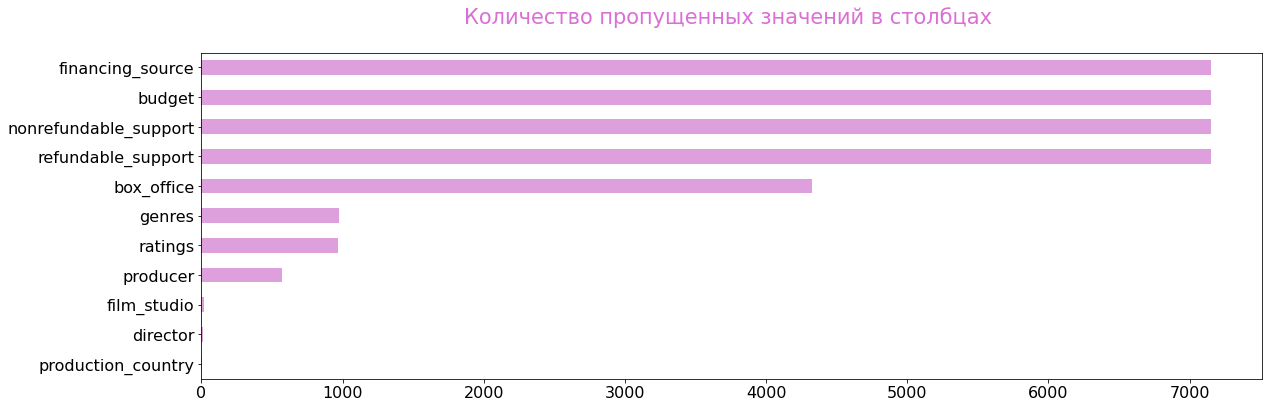

In [30]:
# выведем график пропусков в df_mvsh
check_pass_value_count_barh(df_mvsh)

In [31]:
# функция по выводу графика с процентами наличия пропусков 

def check_pass_value_percent_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16, color = '#DDA0DD')
            .set_title('Количество пропусков в процентах от общего числа значений \n', fontsize = 21, color = '#DA70D6')    
        );    
    except:
        print('пропусков не осталось!')

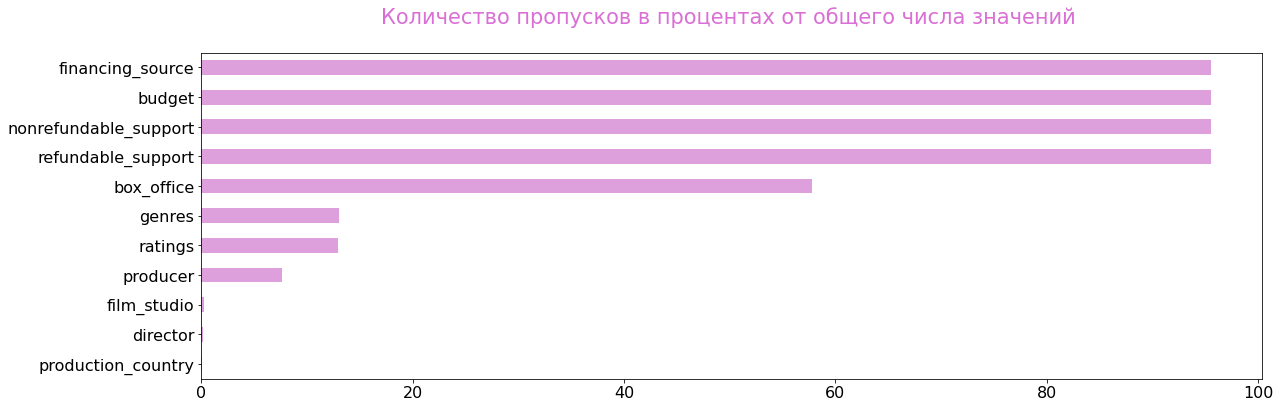

In [32]:
# выведем график пропусков в df_mvsh
check_pass_value_percent_barh(df_mvsh)

#### Столбцы `financing_source`, `budget`, `nonrefundable_support`, `refundable_support`

In [33]:
# подсчитаем точное число пропусков financing_source
print('Количество пропусков financing_source всего:', df_mvsh['financing_source'].isna().sum())

# подсчитаем точное число пропусков financing_source
print('Количество одновремеменных пропусков financing_source, '
      'budget, nonrefundable_support, refundable_support всего:', 
      df_mvsh.loc[(df_mvsh['financing_source'].isna()) 
                  & (df_mvsh['budget'].isna()) 
                  & (df_mvsh['nonrefundable_support'].isna()) 
                  & (df_mvsh['refundable_support'].isna())].shape[0])

Количество пропусков financing_source всего: 7153
Количество одновремеменных пропусков financing_source, budget, nonrefundable_support, refundable_support всего: 7153


Исходя из графиков и подсчета одновременного количество пропусков, следующие столбцы имеют одинаковое и одновременное количество пропусков: 
- `financing_source`— источник государственного финансирования; 
- `budget` — общий бюджет фильма (указан только для тех фильмов, которые получили государственную поддержку);
- `refundable_support` — объём невозвратных средств государственной поддержки;
- `nonrefundable_support` — объём возвратных средств государственной поддержки;

In [34]:
# подсчитаем количество пропусков по сборам для фильмов с гос поддержкой 
print('Количество пропусков financing_source для фильмов с гос поддержкой: ',
     df_mvsh.loc[(df_mvsh['financing_source'].isna()) & (~df_mvsh['budget'].isna())].shape[0])

Количество пропусков financing_source для фильмов с гос поддержкой:  0


Заполнение данных пропусков не требуется, поскольку отсутствие значений в указанных столбцах является признаком того, что для съемок и проката фильма не выделялись средства государственной поддержки. 

Если пропуски  в `financing_source` будут мешать считать аналитические показатели, то оценим позже необходимость их заполнения заглушками.

Пропуски в `budget`, `refundable_support`, `nonrefundable_support` не должны мешать анализу, поскольку пропуски в числовых столбцах при подсчете статистических показателей при применении методов автоматически игнорируются 

#### Столбец `box_office`

Наличие пропуска в `box_office` (сборы в рублях) может означать, что фильм не поступал в прокат в России или что информация о его сборах не известна. Достоверно заполнить пропущеные значения невозможно, поэтому отставим пропуски в этом столбце как есть. 

In [35]:
# подсчитаем количество пропусков по сборам для фильмов с гос поддержкой 
print('Количество пропусков box_office для фильмов с гос поддержкой: ',
     df_mvsh.loc[(df_mvsh['box_office'].isna()) & (~df_mvsh['budget'].isna())].shape[0])

Количество пропусков box_office для фильмов с гос поддержкой:  14


Целевым предметом исследования являются фильмы с гос поддержкой. Для таких фильмов есть 14 пропусков в `box_office`. Достоверно заполнить пропущеные значения невозможно, поэтому отставим пропуски в этом столбце как есть - они могут пригодиться в будущих исследованиях, а для фильмов с гос поддержкой они составляют очень маленький процент

Если они будут мешать считать аналитические показатели, то оценим позже необходимость их заполнения заглушками

#### Столбец `genres`

In [36]:
# подсчитаем количество пропусков по жанрам
print('Количество пропусков genres: ',
     df_mvsh.loc[(df_mvsh['genres'].isna())].shape[0])

# подсчитаем количество пропусков по жанрам для фильмов с гос поддержкой 
print('Количество пропусков genres для фильмов с гос поддержкой: ',
     df_mvsh.loc[(df_mvsh['genres'].isna()) & (~df_mvsh['budget'].isna())].shape[0])

Количество пропусков genres:  975
Количество пропусков genres для фильмов с гос поддержкой:  16


In [37]:
# посмотрим на записи с пропусками в жанре 
display(df_mvsh.loc[(df_mvsh['genres'].isna())].head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДжи, Спайгласс Интертейнмент, Эмблин Интертейнмент, Рэд Вэгон Продакшнс",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон Де Люка, Гэри Барбер, Роджер Бирнбаум",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00+00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентской фирмы ""К + К арт""",Чехия,Владимир Дрга,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Целевым предметом исследования являются фильмы с гос поддержкой. Для таких фильмов есть 16 пропусков в `genres`. Информация о жанре скорее всего заполнялась из разных источников и достоверно заполнить пропущеные значения невозможно, поэтому отставим пропуски в этом столбце как есть - они могут пригодиться в будущих исследованиях, а для фильмов с гос поддержкой они составляют очень маленький процент 

Если они будут мешать считать аналитические показатели, то оценим позже необходимость их заполнения заглушками

#### Столбец `ratings`

In [38]:
# подсчитаем количество пропусков в рейтинге
print('Количество пропусков ratings: ',
     df_mvsh.loc[(df_mvsh['ratings'].isna())].shape[0])

# подсчитаем количество пропусков в рейтинге для фильмов с гос поддержкой 
print('Количество пропусков ratings для фильмов с гос поддержкой: ',
     df_mvsh.loc[(df_mvsh['ratings'].isna()) & (~df_mvsh['budget'].isna())].shape[0])

Количество пропусков ratings:  966
Количество пропусков ratings для фильмов с гос поддержкой:  16


In [39]:
# посмотрим на записи с пропусками в рейтинге 
display(df_mvsh.loc[(df_mvsh['ratings'].isna())].head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДжи, Спайгласс Интертейнмент, Эмблин Интертейнмент, Рэд Вэгон Продакшнс",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон Де Люка, Гэри Барбер, Роджер Бирнбаум",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00+00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентской фирмы ""К + К арт""",Чехия,Владимир Дрга,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Целевым предметом исследования являются фильмы с гос поддержкой. Для таких фильмов есть 16 пропусков в `ratings`. Информация о рейтинге выгружалась скорее всего с сайта Кинопоиска. Достоверно заполнить пропущеные значения невозможно, поэтому отставим пропуски в этом столбце как есть - они могут пригодиться в будущих исследованиях, а для фильмов с гос поддержкой они составляют очень маленький процент 

Если они будут мешать считать аналитические показатели, то оценим позже необходимость их заполнения заглушками

#### Столбец `producer`

In [40]:
# подсчитаем количество пропусков в продюсере
print('Количество пропусков producer: ',
     df_mvsh.loc[(df_mvsh['producer'].isna())].shape[0])

# подсчитаем количество пропусков в продюсере для фильмов с гос поддержкой 
print('Количество пропусков producer для фильмов с гос поддержкой: ',
     df_mvsh.loc[(df_mvsh['producer'].isna()) & (~df_mvsh['budget'].isna())].shape[0])

Количество пропусков producer:  568
Количество пропусков producer для фильмов с гос поддержкой:  2


In [41]:
# посмотрим на записи с пропусками в продюсере
display(df_mvsh.loc[(df_mvsh['producer'].isna())].head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN
11,Ответный ход,111019014,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"боевик,драма,приключения",NaN


Целевым предметом исследования являются фильмы с гос поддержкой. Для таких фильмов есть всего 2 пропуска в `producer`. Достоверно заполнить пропущеные значения невозможно, поэтому отставим пропуски в этом столбце как есть - они могут пригодиться в будущих исследованиях, а для фильмов с гос поддержкой они составляют очень маленький процент 

Если они будут мешать считать аналитические показатели, то оценим позже необходимость их заполнения заглушками

#### Столбец `film_studio`

In [42]:
# подсчитаем количество пропусков в студии-производителе
print('Количество пропусков film_studio: ',
     df_mvsh.loc[(df_mvsh['film_studio'].isna())].shape[0])

# подсчитаем количество пропусков в студии-производителе для фильмов с гос поддержкой 
print('Количество пропусков film_studio для фильмов с гос поддержкой: ',
     df_mvsh.loc[(df_mvsh['film_studio'].isna()) & (~df_mvsh['budget'].isna())].shape[0])

Количество пропусков film_studio:  18
Количество пропусков film_studio для фильмов с гос поддержкой:  0


In [43]:
# посмотрим на записи с пропусками в студии-производителн
display(df_mvsh.loc[(df_mvsh['film_studio'].isna())].head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Нил Лабут, Бенжамин Грейсон, Крис Фоггин","Татьяна Келли, Роберта Мунро, Руперт Френд, Дон Бриджетвотер, Тим Хармс, Бенжамин Грейсон, Крис Кроучер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.3,комедия,NaN
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
6104,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6180,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6378,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В студии-производителе очень маленькое количенство пропусков - всего 18. Целевым предметом исследования являются фильмы с гос поддержкой. Для таких фильмов пропсуков в `film_studio` нет вообще. Достоверно заполнить пропущеные значения невозможно, поэтому отставим пропуски в этом столбце как есть - они могут пригодиться в будущих исследованиях

Если они будут мешать считать аналитические показатели, то оценим позже необходимость их заполнения заглушками

#### Столбец `director`

In [44]:
# подсчитаем количество пропусков в режиссере
print('Количество пропусков director: ',
     df_mvsh.loc[(df_mvsh['director'].isna())].shape[0])

# подсчитаем количество пропусков в режиссере для фильмов с гос поддержкой 
print('Количество пропусков director для фильмов с гос поддержкой: ',
     df_mvsh.loc[(df_mvsh['director'].isna()) & (~df_mvsh['budget'].isna())].shape[0])

Количество пропусков director:  9
Количество пропусков director для фильмов с гос поддержкой:  0


In [45]:
# посмотрим на записи с пропусками в режиссере
display(df_mvsh.loc[(df_mvsh['director'].isna())].head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берлин. Анна Нетребко. Йонес Кауфман. Эрвин Шрот.",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,44350.0
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3839,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4051,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфуллиннын 50 еллык ижат юбилеена багышланган концерт"". (Родники деревни. Юбилейный концерт, посвященный 50-летию творчества Ганса Сайфуллина.)",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4297,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В студии-производителе очень маленькое количенство пропусков - всего 9. Целевым предметом исследования являются фильмы с гос поддержкой. Для таких фильмов пропсуков в `director` нет вообще. Достоверно заполнить пропущеные значения невозможно, поэтому отставим пропуски в этом столбце как есть - они могут пригодиться в будущих исследованиях

Если они будут мешать считать аналитические показатели, то оценим позже необходимость их заполнения заглушками

#### Столбец `production_country`

In [46]:
# подсчитаем количество пропусков в стране-производителе
print('Количество пропусков production_country: ',
     df_mvsh.loc[(df_mvsh['production_country'].isna())].shape[0])

# подсчитаем количество пропусков в стране-производителе для фильмов с гос поддержкой 
print('Количество пропусков production_country для фильмов с гос поддержкой: ',
     df_mvsh.loc[(df_mvsh['production_country'].isna()) & (~df_mvsh['budget'].isna())].shape[0])

# посмотрим на записи с пропусками в стране-производителн
display(df_mvsh.loc[(df_mvsh['production_country'].isna())].head())

Количество пропусков production_country:  2
Количество пропусков production_country для фильмов с гос поддержкой:  0


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3185,"Детский юмористический киножурнал ""Ералаш. Ну просто фантазтика!""",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А.Зеленков, М.Сулейманова и др.","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


В студии-производителе очень маленькое количенство пропусков - всего 2. Целевым предметом исследования являются фильмы с гос поддержкой. Для таких фильмов пропусков в `production_country` нет вообще. 

Можно заметить, что пропуски в столбце `production_country` есть для серийных фильмов. Значит можно посмотреть, чем заполнены значения для других серий и если они все совпадают, то заполнить пропуск таким же значением. 

In [47]:
# проверим значения для других серий Ералаш 
display(df_mvsh.loc[df_mvsh['title'].str.contains('Ералаш'), ['title', 'production_country']])
# проверим значения для других серий Мульт личности 
display(df_mvsh.loc[df_mvsh['title'].str.contains('Мульт личности'),['title','production_country']])

,title,production_country
729,"Детский юмористический киножурнал ""Ералаш"", выпуски 258 - 263",Россия
1010,"Детский юмористический киножурнал ""Ералаш"", выпуски 264 - 269",Россия
1282,"Детский юмористический киножурнал ""Ералаш"", выпуски 270 - 275",Россия
2000,"Детский юмористический киножурнал ""Ералаш"", выпуски 276 - 281",Россия
2143,"Детский юмористический киножурнал ""Ералаш"", выпуски 288 - 293",Россия
2359,"Детский юмористический киножурнал ""Ералаш"", выпуски 282 - 287",Россия
3119,"Детский юмористический киножурнал ""Ералаш"", выпуски 294 - 299",Россия
3185,"Детский юмористический киножурнал ""Ералаш. Ну просто фантазтика!""",NaN
3213,"Детский юмористический киножурнал ""Ералаш"", выпуски 300 - 311",Россия
4016,"Детский юмористический киножурнал ""Ералаш"". Выпуски 240 - 245",Россия


,title,production_country
4440,Мульт личности. Выпуск 5,NaN


Для Ералаша можно заполнить пропуск значением "Россия", для "Мульт личности" похожих значений нет, но известно, что этот мультсериал снимался в России, поэтому можно тоже его заполнить аналогичным значением 

In [48]:
# заполнение пропуска для Ералаш
df_mvsh.loc[(df_mvsh['production_country'].isna()) 
            & df_mvsh['title'].str.contains('Ералаш'), 'production_country'] = 'Россия'
# заполнение пропуска для Мульт личности 
df_mvsh.loc[(df_mvsh['production_country'].isna()) 
            & df_mvsh['title'].str.contains('Мульт личности'), 'production_country'] = 'Россия'

# подсчитаем количество пропусков в стране-производителе после заполнения 
print('Количество пропусков production_country: ',
     df_mvsh.loc[(df_mvsh['production_country'].isna())].shape[0])

Количество пропусков production_country:  0


### Шаг 2.3. Изучение дубликатов в датафрейме


Выполним проверку явных дубликатов 

In [49]:
# оценим количество полных дубликатов в датасете
df_mvsh.duplicated().sum()

0

In [50]:
# оценим количество полных дубликатов по названию фильма и номеру прокатного удостоверения 
df_mvsh[['title','puNumber']].duplicated().sum()

0

Явные дубликаты в датасете отсутствуют - полных дубликатов нет и все пары "Фильм-Номер прокатного удостоверения" уникальны

Выполним проверку неявных дубликатов 

In [51]:
# проверим, есть ли одинаковые прокатные удостоверения для разных фильмов 
df_mvsh['puNumber'].duplicated().sum()

2

In [52]:
# получим номера прокатных удостоверений где их количество больше 1
df_mvsh['puNumber'].value_counts().head()

221054410    2
221154310    2
221048915    1
121004611    1
121014411    1
Name: puNumber, dtype: int64

Выявили, что есть 2 случая одинаковых прокатных удостоверения для разных фильмов - посмотрим что это за фильмы

In [53]:
display(df_mvsh.loc[(df_mvsh['puNumber'] == 221054410) | (df_mvsh['puNumber'] == 221154310)])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксьон, Марс Дистрибусьон, Канал +",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роману Донны Вулфольк Кросс/,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне Филис, Икури Филмз, Медуза Фильм, У Эф А Интернэшнл Филм энд Ти Ви Продуцион, Юниверсум Филм",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5066,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи-Пи Интертейнмент, Баалтимор Спринг Крик Пикчерз Фейс, Трайбека",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


То, что на одном прокатном удостоверении два фильма является ошибкой. Но какой из этих фильмов следует удалить нам неизвестно. Все 4 фильма не имеют гос поддержки и не являются предметом целевого исследования. Поэтому при подготовке среза для анализа фильмов с гос поддержкой, они автоматически исключаться. Поэтому можно оставить данную аномалию как есть, без удаления строк. 

### Шаг 2.4. Изучение категориальных значений


В датафрейе `df_mvsh` к категориальным относятся следующие значения: 

- `title` — название фильма;
- `puNumber` — номер прокатного удостоверения; 
- `show_start_date` — дата премьеры фильма; 
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country`- страна-производитель;
- `director` — режиссёр; 
- `producer`  — продюсер;
- `age_restriction` — возрастная категория;
- `financing_source`— источник государственного финансирования; 
- `genres` — жанр фильма

In [54]:
# вспомним итоговые типы данных для столбцов 
df_mvsh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   puNumber               7485 non-null   int64              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7485 non-null   object             
 6   director               7476 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

Все категориальные значения имеют тип `object`, за исключением `puNumber` и `show_start_date`, но проверку аномалий для этих столбцов мы уже выполнили на этапе преобразования данных. 

Поэтому для оценки ошибок и аномалий в значениях остальных категориальных параметрах для наачла получим список их уникальных значений через цикл:

In [55]:
# выведем перечень уникальных значений для категоориальных столбцов с типом object
for i in df_mvsh.columns:
    if df_mvsh[i].dtype == 'object':
        display(i)
        display(df_mvsh[i].sort_values().unique())

'title'

array([' Я ПРЕПОД', '"SOS" над тайгой', '"V" значит вендетта', ...,
       'Ярость / Fury',
       'альманах документальных фильмов "Вокзалы России: История, Любовь и Великие тайны…" Фильм первый "ВОКЗАЛЫ РОССИИ СВЯЗЬ ВРЕМЕН"',
       'сНежное шоу'], dtype=object)

'type'

array([' Анимационный', ' Художественный', 'Анимационный',
       'Документальный', 'Музыкально-развлекательный',
       'Научно-популярный', 'Прочие', 'Художественный'], dtype=object)

'film_studio'

array([' АНО "Кинофорум"',
       ' Ауматик Интертейнмент, Блюмхаус Продакшнз и др.',
       ' ЗАО "Кинокомпания ФаворитФильм" по заказу ООО "ФАВОРИТ МЕДИА"',
       ...,
       'совместное производство Киностудия "Мосфильм", "Космос-филм" (Франция), "Посейдон Продакшинз Лимитед" (Англия), "ИКАИК" (Куба), ДЕФА (ГДР)',
       'юФилм, Твинпикс', nan], dtype=object)

'production_country'

array([' СССР', ' СССР ', ' СССР   ', '2019', 'CША', 'Австралия',
       'Австралия - Великобритания - Бельгия - Индия',
       'Австралия - Германия', 'Австралия - Ирландия',
       'Австралия - Колумбия', 'Австралия - США', 'Австралия, Канада',
       'Австралия, США', 'Австралия-Великобритания', 'Австралия-Ирландия',
       'Австралия-США', 'Австралия-Турция-США', 'Австрия',
       'Австрия - Германия', 'Австрия - Германия - Франция',
       'Австрия - Люксембург', 'Австрия, Великобритания, Германия',
       'Австрия-Германия-Франция', 'Австрия-Франция-Германия',
       'Азербайджан-Россия', 'Аргентина', 'Аргентина - Бразилия',
       'Аргентина - Испания', 'Аргентина - Испания - Уругвай',
       'Аргентина - Мексика - Бразилия - Франция - США',
       'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
       'Аргентина - Франция - Испания', 'Аргентина, Испания',
       'Аргентина-Испания', 'Армения', 'Армения - Германия',
       'Армения - Казахстан', 'Армения-Россия

'director'

array([' Йохан Нийенхейс', ' Н.Орлов, Р.Быков', ' Р.Асхаев', ...,
       'хореография Фредерика Аштона', 'хореография Фредерика Эштона',
       nan], dtype=object)

'producer'

array([' А.Шальопа', ' Г.Шпригов',
       ' Дитмар Ганше, Филипп Фогес,  Бенджамин Херрман, Миша Хоффманн, Эберхард Юнексдорф, Энн Мередит',
       ..., 'Яэль Бергман, Лаура Уотерс, Питер Хеллайар',
       'Яэль Фогель, Летиция Гонзалез', nan], dtype=object)

'age_restriction'

array(['«0+» - для любой зрительской аудитории',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет', '«18+» - запрещено для детей',
       '«6+» - для детей старше 6 лет'], dtype=object)

'financing_source'

array(['Министерство культуры', 'Министерство культуры, Фонд кино',
       'Фонд кино', nan], dtype=object)

'genres'

array(['аниме,мультфильм', 'аниме,мультфильм,боевик',
       'аниме,мультфильм,детектив', 'аниме,мультфильм,драма',
       'аниме,мультфильм,комедия', 'аниме,мультфильм,короткометражка',
       'аниме,мультфильм,мелодрама', 'аниме,мультфильм,приключения',
       'аниме,мультфильм,ужасы', 'аниме,мультфильм,фантастика',
       'аниме,мультфильм,фэнтези', 'биография', 'биография,военный,драма',
       'биография,документальный', 'биография,драма',
       'биография,драма,военный', 'биография,драма,история',
       'биография,драма,криминал', 'биография,история',
       'биография,история,драма', 'биография,криминал,драма',
       'биография,криминал,триллер', 'биография,мелодрама,драма',
       'биография,музыка,драма', 'биография,музыка,мюзикл',
       'биография,спорт,драма', 'биография,спорт,история',
       'биография,спорт,комедия', 'боевик', 'боевик,вестерн,приключения',
       'боевик,военный', 'боевик,военный,драма', 'боевик,военный,история',
       'боевик,детектив', 'боевик,драм

Обнаруженные проблемы в категориальных столбцах: 
- 'title' - наличие пробелов в начале названия, есть указание дувх название на русском и английском 
- 'type' - наличие пробелов в начале названия 
- 'film_studio' - наличие пробелов в начале названия 
- 'production_country' - наличие пробелов в начале названия и в конце названия; если стран-производителей несколько, то для их разделения используются разнные разделители - ', ', '-', ' - ', ' -' 
- 'director' - наличие пробелов в начале названия
- 'producer' - наличие пробелов в начале названия

Основной проблемой во всех перечисленных столбцах является наличие пробелов в начале и в конце значений. Исправим ее  

In [56]:
# перед исправлением подсчитаем количество уникальных значений в столбцах 
print('Количество уникальных значений в столбце title: ', len(df_mvsh['title'].unique()))
print('Количество уникальных значений в столбце type: ', len(df_mvsh['type'].unique()))
print('Количество уникальных значений в столбце film_studio: ', len(df_mvsh['film_studio'].unique()))
print('Количество уникальных значений в столбце production_country: ', len(df_mvsh['production_country'].unique()))
print('Количество уникальных значений в столбце director: ', len(df_mvsh['director'].unique()))
print('Количество уникальных значений в столбце producer: ', len(df_mvsh['producer'].unique()))

Количество уникальных значений в столбце title:  6771
Количество уникальных значений в столбце type:  8
Количество уникальных значений в столбце film_studio:  5491
Количество уникальных значений в столбце production_country:  950
Количество уникальных значений в столбце director:  4812
Количество уникальных значений в столбце producer:  5350


In [57]:
# удалим пробелы в начале и в конце значений столбцов 
df_mvsh['title'] = df_mvsh['title'].str.strip()
df_mvsh['type'] = df_mvsh['type'].str.strip()
df_mvsh['film_studio'] = df_mvsh['film_studio'].str.strip()
df_mvsh['production_country'] = df_mvsh['production_country'].str.strip()
df_mvsh['director'] = df_mvsh['director'].str.strip()
df_mvsh['producer'] = df_mvsh['producer'].str.strip()

Также в 'production_country' если стран-производителей несколько, то для их разделения используются разнные разделители - ', ', '-', ' - ', ' -'. Применим какой-нибудь один, например, тире без проблеов '-'.

Также в 'production_country' есть значение 'CША', которое написано разными алфавитами. Исправим это и напишем название полностью русскими буквами 

In [58]:
df_mvsh['production_country'] = df_mvsh['production_country'].str.replace(', ', '-')
df_mvsh['production_country'] = df_mvsh['production_country'].str.replace(' - ', '-')
df_mvsh['production_country'] = df_mvsh['production_country'].str.replace(' -', '-')
df_mvsh['production_country'] = df_mvsh['production_country'].str.replace('CША', 'США')

Также видим в 'production_country' значение 2019, которое не очень похоже на название страны.  Посмотрим на строчку датафрейма с этим значением 

In [59]:
display(df_mvsh.loc[df_mvsh['production_country'] == '2019'])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7246,Дело Коллини,121027219,2019-09-19 12:00:00+00:00,Художественный,"Константин Филм, Глобал Скрин, Севен Пикчерз Сван",2019,Марко Кройцпайнтнер,"Мартин Московиц, Кристоф Мюллер, Марсель Хартгес, Керстин Шмидбауэр",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"детектив,драма,криминал",NaN


Видимо при заполнении произошла опечатка, но тк страну-производитель мы предположить не можем, то оставим это значением без изменений 

In [60]:
# выведем перечень уникальных значений для категоориальных столбцов с типом object
# и проверим были ли исправлены обнаруженные проблемы 
for i in df_mvsh.columns:
    if df_mvsh[i].dtype == 'object':
        display(i)
        display(df_mvsh[i].sort_values().unique())

'title'

array(['"SOS" над тайгой', '"V" значит вендетта',
       '"АРТиШОК" анимационный альманах авторских фильмов', ...,
       'Ярость / Fury',
       'альманах документальных фильмов "Вокзалы России: История, Любовь и Великие тайны…" Фильм первый "ВОКЗАЛЫ РОССИИ СВЯЗЬ ВРЕМЕН"',
       'сНежное шоу'], dtype=object)

'type'

array(['Анимационный', 'Документальный', 'Музыкально-развлекательный',
       'Научно-популярный', 'Прочие', 'Художественный'], dtype=object)

'film_studio'

array(['"Дино де Лаурентиис" (Италия) при участии Киностудии "Мосфильм"',
       '"Союздетфильм", "Мосфильм", "Москинокомбинат"',
       '"Студия "Птица Феникс" Татьяны Новиковой', ...,
       'совместное производство Киностудия "Мосфильм", "Космос-филм" (Франция), "Посейдон Продакшинз Лимитед" (Англия), "ИКАИК" (Куба), ДЕФА (ГДР)',
       'юФилм, Твинпикс', nan], dtype=object)

'production_country'

array(['2019', 'Австралия', 'Австралия-Великобритания',
       'Австралия-Великобритания-Бельгия-Индия', 'Австралия-Германия',
       'Австралия-Ирландия', 'Австралия-Канада', 'Австралия-Колумбия',
       'Австралия-США', 'Австралия-Турция-США', 'Австрия',
       'Австрия-Великобритания-Германия', 'Австрия-Германия',
       'Австрия-Германия-Франция', 'Австрия-Люксембург',
       'Австрия-Франция-Германия', 'Азербайджан-Россия', 'Аргентина',
       'Аргентина-Бразилия', 'Аргентина-Испания',
       'Аргентина-Испания-Уругвай',
       'Аргентина-Мексика-Бразилия-Франция-США',
       'Аргентина-Уругвай-Россия-Германия-Франция-Нидерланды',
       'Аргентина-Франция-Испания', 'Армения', 'Армения-Германия',
       'Армения-Казахстан', 'Армения-Россия', 'Бельгия',
       'Бельгия-Великобритания-США',
       'Бельгия-Германия-Канада-Франция-США-Великобритания',
       'Бельгия-Германия-Люксембург',
       'Бельгия-Германия-Люксембург-Франция',
       'Бельгия-Испания-Канада-Нидерланды', 'Бельг

'director'

array(['Ёлкин Туйчиев', 'Ён Сан-хо', 'А Андрющенко', ...,
       'хореография Фредерика Аштона', 'хореография Фредерика Эштона',
       nan], dtype=object)

'producer'

array(['"Фонд Михаила Калатозова"', 'Ёсиаки Нисимура, Джеффри Уэкслер',
       'А. Калюжный', ..., 'Яэль Бергман, Лаура Уотерс, Питер Хеллайар',
       'Яэль Фогель, Летиция Гонзалез', nan], dtype=object)

'age_restriction'

array(['«0+» - для любой зрительской аудитории',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет', '«18+» - запрещено для детей',
       '«6+» - для детей старше 6 лет'], dtype=object)

'financing_source'

array(['Министерство культуры', 'Министерство культуры, Фонд кино',
       'Фонд кино', nan], dtype=object)

'genres'

array(['аниме,мультфильм', 'аниме,мультфильм,боевик',
       'аниме,мультфильм,детектив', 'аниме,мультфильм,драма',
       'аниме,мультфильм,комедия', 'аниме,мультфильм,короткометражка',
       'аниме,мультфильм,мелодрама', 'аниме,мультфильм,приключения',
       'аниме,мультфильм,ужасы', 'аниме,мультфильм,фантастика',
       'аниме,мультфильм,фэнтези', 'биография', 'биография,военный,драма',
       'биография,документальный', 'биография,драма',
       'биография,драма,военный', 'биография,драма,история',
       'биография,драма,криминал', 'биография,история',
       'биография,история,драма', 'биография,криминал,драма',
       'биография,криминал,триллер', 'биография,мелодрама,драма',
       'биография,музыка,драма', 'биография,музыка,мюзикл',
       'биография,спорт,драма', 'биография,спорт,история',
       'биография,спорт,комедия', 'боевик', 'боевик,вестерн,приключения',
       'боевик,военный', 'боевик,военный,драма', 'боевик,военный,история',
       'боевик,детектив', 'боевик,драм

In [61]:
# подсчитаем количество уникальных значений в столбцах после исправления
print('Количество уникальных значений в столбце title: ', len(df_mvsh['title'].unique()))
print('Количество уникальных значений в столбце type: ', len(df_mvsh['type'].unique()))
print('Количество уникальных значений в столбце film_studio: ', len(df_mvsh['film_studio'].unique()))
print('Количество уникальных значений в столбце production_country: ', len(df_mvsh['production_country'].unique()))
print('Количество уникальных значений в столбце director: ', len(df_mvsh['director'].unique()))
print('Количество уникальных значений в столбце producer: ', len(df_mvsh['producer'].unique()))

Количество уникальных значений в столбце title:  6771
Количество уникальных значений в столбце type:  6
Количество уникальных значений в столбце film_studio:  5463
Количество уникальных значений в столбце production_country:  814
Количество уникальных значений в столбце director:  4802
Количество уникальных значений в столбце producer:  5335


**Результат исправления проблем в категориальных столбцах:**
- Все отмеченные проблемы в категориальных столбцах были успешно исправлены 
- сократилось число уникальных значений в столбцах: 
    - в столбце type:  стало 6 (было 8)
    - в столбце film_studio:  стало 5463 (было 5491)
    - в столбце production_country:  стало 814 (было 950)
    - в столбце director:  стало 4802 (было 4812)
    - в столбце producer:  стало 5335 (было 5350)
    


### Шаг 2.5. Проверка количественных значений

В датафрейе `df_mvsh` к количественным относятся следующие значения: 

- `refundable_support` — объём возвратных средств государственной поддержки;
- `nonrefundable_support` — объём невозвратных средств государственной поддержки;
- `budget` — общий бюджет фильма;
- `ratings` — рейтинг фильма на КиноПоиске;
- `box_office` — сборы в рублях.

Все перечисленные количественные значения имеют тип `float64`

Для оценки ошибок и аномалий в значениях количественных параметрах для наачла получим список их уникальных значений через цикл:

In [62]:
# выведем перечень уникальных значений для категоориальных столбцов с типом object
for i in df_mvsh.columns:
    if df_mvsh[i].dtype == 'float64':
        display(i)
        display(df_mvsh[i].sort_values().unique())

'refundable_support'

array([0.000000e+00, 3.500000e+06, 5.000000e+06, 7.000000e+06,
       7.153119e+06, 7.346881e+06, 8.000000e+06, 9.000000e+06,
       1.000000e+07, 1.500000e+07, 1.700000e+07, 1.900000e+07,
       2.000000e+07, 2.500000e+07, 2.600000e+07, 2.800000e+07,
       2.900000e+07, 3.000000e+07, 3.500000e+07, 3.600000e+07,
       3.800000e+07, 4.000000e+07, 4.100000e+07, 4.400000e+07,
       5.000000e+07, 5.500000e+07, 6.000000e+07, 7.500000e+07,
       8.000000e+07, 1.000000e+08, 1.100000e+08, 1.150000e+08,
       1.500000e+08, 1.800000e+08,          nan])

'nonrefundable_support'

array([0.00000000e+00, 3.00000000e+06, 4.70000000e+06, 5.00000000e+06,
       5.30000000e+06, 6.00000000e+06, 8.00000000e+06, 1.00000000e+07,
       1.15200000e+07, 1.50000000e+07, 2.00000000e+07, 2.01452850e+07,
       2.17000000e+07, 2.29040000e+07, 2.30000000e+07, 2.40000000e+07,
       2.44500000e+07, 2.45000000e+07, 2.49860000e+07, 2.50000000e+07,
       2.52000000e+07, 2.53450000e+07, 2.55000000e+07, 2.59000000e+07,
       2.60000000e+07, 2.65000000e+07, 2.69500000e+07, 2.70000000e+07,
       2.75000000e+07, 2.75100000e+07, 2.80000000e+07, 2.85000000e+07,
       2.90000000e+07, 3.00000000e+07, 3.01239150e+07, 3.10000000e+07,
       3.40000000e+07, 3.50000000e+07, 3.70000000e+07, 4.00000000e+07,
       4.15000000e+07, 4.50000000e+07, 4.65022990e+07, 5.00000000e+07,
       5.00008660e+07, 5.10000000e+07, 5.50000000e+07, 5.65790550e+07,
       5.90000000e+07, 6.00000000e+07, 6.40000000e+07, 7.00000000e+07,
       7.50000000e+07, 8.00000000e+07, 8.50000000e+07, 9.00000000e+07,
      

'budget'

array([0.00000000e+00, 1.44624640e+07, 1.50100000e+07, 1.81664180e+07,
       1.87060800e+07, 2.70000000e+07, 2.81155800e+07, 2.85714290e+07,
       3.00000000e+07, 3.04489110e+07, 3.08000000e+07, 3.13053130e+07,
       3.30000000e+07, 3.50000000e+07, 3.52969500e+07, 3.57142860e+07,
       3.57600600e+07, 3.60162690e+07, 3.62595000e+07, 3.70009900e+07,
       3.71428570e+07, 3.73712620e+07, 3.74247960e+07, 3.75000000e+07,
       3.76000000e+07, 3.77442800e+07, 3.77656540e+07, 3.78491030e+07,
       3.78787870e+07, 3.78891650e+07, 3.79436520e+07, 3.80000000e+07,
       3.84400000e+07, 3.84615380e+07, 3.84667000e+07, 3.84768690e+07,
       3.85000000e+07, 3.88582600e+07, 3.90000000e+07, 3.90579710e+07,
       3.91292890e+07, 3.97000000e+07, 3.99900000e+07, 4.00000000e+07,
       4.00151220e+07, 4.02650000e+07, 4.02877700e+07, 4.05000000e+07,
       4.05741400e+07, 4.06008000e+07, 4.10000000e+07, 4.14978600e+07,
       4.19989840e+07, 4.20000000e+07, 4.22525090e+07, 4.28600000e+07,
      

'ratings'

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.1, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.4, 9.7, 9.8, 9.9, nan])

'box_office'

array([0.00000000e+00, 4.00000000e+01, 5.00000000e+01, ...,
       2.77968614e+09, 3.07356869e+09,            nan])

Каким образом можно улучшить количественные переменные: 
- выполним проверку, сколько записей в датафрейме удовлетвоят условию: 
`budget >= refundable_support + nonrefundable_support`
- выполним проверку, сколько записей в датафрейме удовлетвоят условию: 
`budget < refundable_support + nonrefundable_support`
- проверим, есть ли значения `0` в `budget, refundable_support, nonrefundable_support` и оценим насколько это корректно 
- видим, что все значения с денежными значениями `budget, refundable_support, nonrefundable_support, box_office` имеют высокую разрядность - до 9-ти нулей. Для улучшения восприятия переведем их в миллионы, разделив значения на 1 000 000 

In [63]:
#  проверим сколько всего фильмов с гос поддержкой 
print('Количество записей budget not isna: ',
     df_mvsh.loc[~df_mvsh['budget'].isna()].shape[0])

#  проверим сколько фильмов с гос поддержкой имеют бюджет >= сумме возвратных и невозвратных средств
print('Количество записей budget > refundable_support + nonrefundable_support: ',
     df_mvsh.loc[df_mvsh['budget'] 
                 > (df_mvsh['refundable_support'] + df_mvsh['nonrefundable_support'])].shape[0])

#  проверим сколько фильмов с гос поддержкой имеют бюджет == сумме возвратных и невозвратных средств
print('Количество записей budget == refundable_support + nonrefundable_support: ',
     df_mvsh.loc[df_mvsh['budget'] 
                 == (df_mvsh['refundable_support'] + df_mvsh['nonrefundable_support'])].shape[0])

#  проверим сколько фильмов с гос поддержкой имеют бюджет меньше суммы возвратных и невозвратных средств
print('Количество записей budget < refundable_support + nonrefundable_support: ',
     df_mvsh.loc[df_mvsh['budget'] 
                 < (df_mvsh['refundable_support'] + df_mvsh['nonrefundable_support'])].shape[0])

#  проверим сколько всего фильмов с гос поддержкой где бюжет == 0
print('Количество записей budget == 0: ',
     df_mvsh.loc[df_mvsh['budget'] == 0].shape[0])

#  проверим сколько всего фильмов с гос поддержкой где бюжет == 0
print('Количество записей budget == 0, а refundable_support != 0 и nonrefundable_support != 0: ',
     df_mvsh.loc[(df_mvsh['budget'] == 0) 
                & (df_mvsh['refundable_support'] != 0)
                & (df_mvsh['nonrefundable_support'] != 0)].shape[0])

#  проверим сколько всего фильмов с гос поддержкой где бюжет == 0
print('Количество записей budget == 0, а refundable_support == 0 и nonrefundable_support != 0: ',
     df_mvsh.loc[(df_mvsh['budget'] == 0) 
                & (df_mvsh['refundable_support'] == 0)
                & (df_mvsh['nonrefundable_support'] != 0)].shape[0])

#  проверим сколько всего фильмов с гос поддержкой где бюжет == 0
print('Количество записей budget == 0, а refundable_support != 0 и nonrefundable_support == 0: ',
     df_mvsh.loc[(df_mvsh['budget'] == 0) 
                & (df_mvsh['refundable_support'] != 0)
                & (df_mvsh['nonrefundable_support'] == 0)].shape[0])

Количество записей budget not isna:  332
Количество записей budget > refundable_support + nonrefundable_support:  315
Количество записей budget == refundable_support + nonrefundable_support:  0
Количество записей budget < refundable_support + nonrefundable_support:  17
Количество записей budget == 0:  17
Количество записей budget == 0, а refundable_support != 0 и nonrefundable_support != 0:  9
Количество записей budget == 0, а refundable_support == 0 и nonrefundable_support != 0:  7
Количество записей budget == 0, а refundable_support != 0 и nonrefundable_support == 0:  1


Результат проверки показал, что: 
- у нас всего 332 фильма с гос поддержкой
- из них для 315 общий бюджет фильма превышает сумму объемов возвратных и невозвратных средств гос поддержки. Вероятная причина этого - что у таких фильмов были еще дополнительные источники финансирования 
- нет записей, где общий бюджет фильма равен сумме объемов возвратных и невозвратных средств гос поддержки
- зато есть записи где общий бюджет фильма меньше суммы объемов возвратных и невозвратных средств гос поддержки. Это выглядит аномальным, поэтому стоит заменить значения `budget`  на сумму `refundable_support + nonrefundable_support`
- также есть 17 фильмов, где бюджет фильма равен 0, но при этом есть значения в объеме возвратных и невозвратных средств гос поддержки, поэтому нулевые значения бюджета также следуют заменить на сумму `refundable_support + nonrefundable_support`

In [64]:
# заполним бюджте по формуле 
# budget = refundable_support + nonrefundable_support
#  для фильмов, где бюджет меньше суммы возвратных и невозвратных средств 
df_mvsh.loc[df_mvsh['budget'] 
                 < (df_mvsh['refundable_support'] 
                    + df_mvsh['nonrefundable_support']), 'budget'] = \
df_mvsh['refundable_support'] + df_mvsh['nonrefundable_support']

#  для фильмов где бюжет == 0
df_mvsh.loc[df_mvsh['budget'] == 0, 'budget'] = \
df_mvsh['refundable_support'] + df_mvsh['nonrefundable_support']

# проверим результат заполнения 
print('Количество записей budget < refundable_support + nonrefundable_support: ',
     df_mvsh.loc[df_mvsh['budget'] 
                 < (df_mvsh['refundable_support'] + df_mvsh['nonrefundable_support'])].shape[0])

#  проверим результат заполнения 
print('Количество записей budget == 0: ',
     df_mvsh.loc[df_mvsh['budget'] == 0].shape[0])

#  проверим сколько фильмов с гос поддержкой имеют бюджет == сумме возвратных и невозвратных средств
print('Количество записей budget == refundable_support + nonrefundable_support: ',
     df_mvsh.loc[df_mvsh['budget'] 
                 == (df_mvsh['refundable_support'] + df_mvsh['nonrefundable_support'])].shape[0])

Количество записей budget < refundable_support + nonrefundable_support:  0
Количество записей budget == 0:  0
Количество записей budget == refundable_support + nonrefundable_support:  17


Заполнение прошло корректно. 

#### Новые столбцы  `budget_mln, refundable_support_mln, nonrefundable_support_mln, box_office_mln`

Для улучшения восприятия переведем знаяения столбцов `budget, refundable_support, nonrefundable_support, box_office` в миллионы, разделив значения на 1 000 000 и сохраним их в новых стоблбцах  `budget_mln, refundable_support_mln, nonrefundable_support_mln, box_office_mln`

In [65]:
# создадим новые столбцы, хранящие значения в миллионах
df_mvsh['budget_mln'] = df_mvsh['budget'] / 1000000
df_mvsh['refundable_support_mln'] = df_mvsh['refundable_support'] / 1000000
df_mvsh['nonrefundable_support_mln'] = df_mvsh['nonrefundable_support'] / 1000000
df_mvsh['box_office_mln'] = df_mvsh['box_office'] / 1000000

# проверим их заполнение 
display(df_mvsh.loc[~df_mvsh['budget'].isna(), ['budget', 'budget_mln', 
                 'refundable_support', 'refundable_support_mln',
                 'nonrefundable_support', 'nonrefundable_support_mln',
                 'box_office', 'box_office_mln']].head(10))

,budget,budget_mln,refundable_support,refundable_support_mln,nonrefundable_support,nonrefundable_support_mln,box_office,box_office_mln
1281,79411900.0,79.411900,0.0,0.0,26500000.0,26.500000,365353.6,0.365354
1448,37142857.0,37.142857,0.0,0.0,26000000.0,26.000000,28140.0,0.028140
1498,176023490.0,176.023490,0.0,0.0,107847945.0,107.847945,19957031.5,19.957031
1524,40574140.0,40.574140,0.0,0.0,28000000.0,28.000000,55917.5,0.055918
1792,40015122.0,40.015122,0.0,0.0,25000000.0,25.000000,232100.0,0.232100
1853,51850000.0,51.850000,0.0,0.0,25000000.0,25.000000,15078858.6,15.078859
1869,220588394.0,220.588394,50000000.0,50.0,100000000.0,100.000000,249166767.7,249.166768
1870,86210067.0,86.210067,0.0,0.0,46502299.0,46.502299,4731239.5,4.731240
1902,139551503.0,139.551503,0.0,0.0,75000000.0,75.000000,352804320.4,352.804320
1911,48571430.0,48.571430,0.0,0.0,34000000.0,34.000000,51907.5,0.051908


Заполнение столбцов произведено корректно 

#### Стастистические характеристики `refundable_support_mln` — объём возвратных средств государственной поддержки (в млн)

In [66]:
# посмотрим значения статистических характеристик столбца refundable_support_mln
df_mvsh['refundable_support_mln'].describe()

count    332.000000
mean      11.864458
std       24.916555
min        0.000000
25%        0.000000
50%        0.000000
75%       15.000000
max      180.000000
Name: refundable_support_mln, dtype: float64

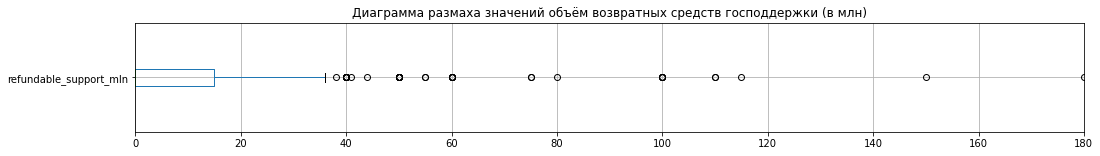

In [67]:
# диаграммы размаха refundable_support_mln

fig, ax = plt.subplots(figsize = (17,2))
ax = df_mvsh[['refundable_support_mln']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений объём возвратных средств господдержки (в млн)')
ax.set_xlim(0, 180);

Объем возвратных средств государственной поддержки составляет от 0 до 180 млн. При этом более 15 млн соствляет всего 25% от общего количества представленных данных о гос поддержке

#### Стастистические характеристики `nonrefundable_support_mln` — объём невозвратных средств государственной поддержки

In [68]:
# посмотрим значения статистических характеристик столбца nonrefundable_support_mln
df_mvsh['nonrefundable_support_mln'].describe()

count    332.000000
mean      48.980989
std       59.980118
min        0.000000
25%       25.000000
50%       30.000000
75%       40.375000
max      400.000000
Name: nonrefundable_support_mln, dtype: float64

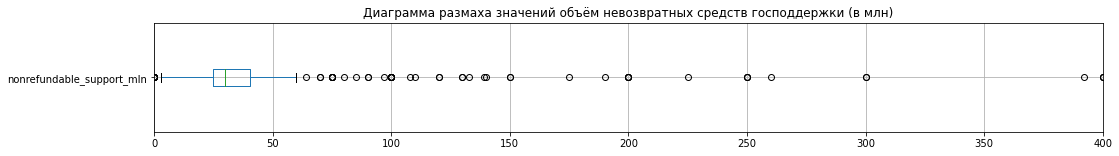

In [69]:
# диаграммы размаха refundable_support_mln

fig, ax = plt.subplots(figsize = (17,2))
ax = df_mvsh[['nonrefundable_support_mln']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений объём невозвратных средств господдержки (в млн)')
ax.set_xlim(0, 400);

Объем возвратных средств государственной поддержки составляет от 0 до 400 млн. При этом более 40 млн соствляет всего 25% от общего количества представленных данных о гос поддержке. Медианное значение - 30 млн. 

#### Стастистические характеристики `budget_mln` — общий бюджет фильма

In [70]:
# посмотрим значения статистических характеристик столбца budget_mln
df_mvsh['budget_mln'].describe()

count     332.000000
mean      131.422396
std       187.148243
min         6.000000
25%        45.524800
50%        71.196901
75%       150.000000
max      2305.074303
Name: budget_mln, dtype: float64

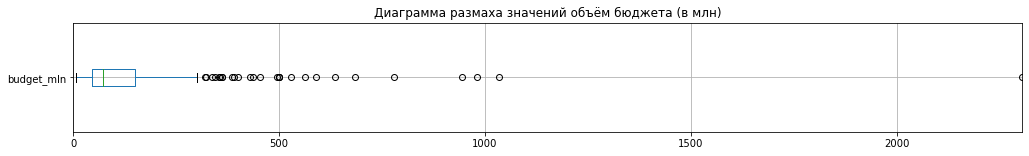

In [71]:
# диаграммы размаха budget_mln

fig, ax = plt.subplots(figsize = (17,2))
ax = df_mvsh[['budget_mln']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений объём бюджета (в млн)')
ax.set_xlim(0, 2305);

Объем бюджета составляет от 6 до 2 305 млн. При этом 25% от общего количества представленных данных о гос поддержке имеют бюджет более 150 млн. Медианное значение - 71 млн. 

#### Стастистические характеристики `ratings` — рейтинг фильма на КиноПоиске

In [72]:
# посмотрим значения статистических характеристик столбца ratings
df_mvsh['ratings'].describe()

count    6519.000000
mean        6.488173
std         1.114638
min         1.000000
25%         5.900000
50%         6.600000
75%         7.200000
max         9.900000
Name: ratings, dtype: float64

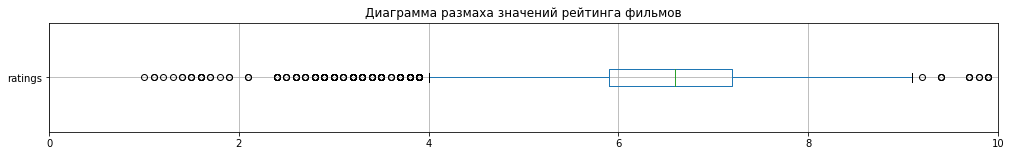

In [73]:
# диаграммы размаха ratings

fig, ax = plt.subplots(figsize = (17,2))
ax = df_mvsh[['ratings']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений рейтинга фильмов')
ax.set_xlim(0, 10);

Значения рейтингов фильмлв разбросаны от 1 до 9.9. При этом 25% от общего количества фильмов имеют рейтинг более 7.2. Медианное значение - 6.6. 

#### Стастистические характеристики `box_office_mln` — сборы в рублях

In [74]:
# посмотрим значения статистических характеристик столбца box_office_mln
df_mvsh['box_office_mln'].describe()

count    3158.000000
mean       76.478696
std       240.353123
min         0.000000
25%         0.086239
50%         2.327988
75%        23.979671
max      3073.568691
Name: box_office_mln, dtype: float64

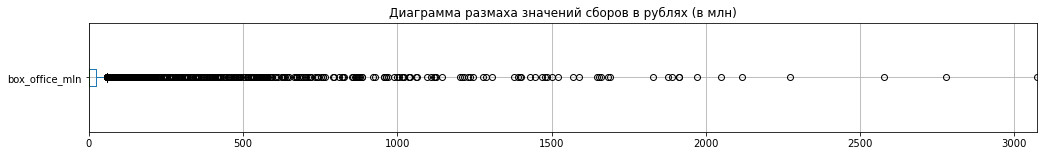

In [75]:
# диаграммы размаха box_office_mln

fig, ax = plt.subplots(figsize = (17,2))
ax = df_mvsh[['box_office_mln']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений сборов в рублях (в млн)')
ax.set_xlim(0, 3074);

Значения сборов в рублях разбросаны от 1 до 3 073 млн. При этом 25% от общего количества фильмов, для которых есть значение сборов в рублях, имеют сборы более 23.9 млн. Медианное значение - 2.3 млн 

### Шаг 2.6. Добавление новых столбцов





#### Столбец `year_show` (год проката фильма)

In [76]:
# напишем функцию year_exposition_func, которая возвращает год из переданной даты
# входным параметром функции является значение столбца датафрейма

def year_exposition_func(date):
    try:
        return date.year
    except:
        pass

In [77]:
# создадим новый столбец year_show, который будет содержать значение года публикации объявления
df_mvsh['year_show'] = df_mvsh['show_start_date'].apply(year_exposition_func)

# выведем первые 5 строк датафрейма, чтобы проверить корректность заполнения столбца year_show
display(df_mvsh[['show_start_date', 'year_show']].head())

,show_start_date,year_show
0,2015-11-27 12:00:00+00:00,2015
1,2016-09-13 12:00:00+00:00,2016
2,2016-10-10 12:00:00+00:00,2016
3,2016-06-10 12:00:00+00:00,2016
4,2015-07-29 12:00:00+00:00,2015


#### Столбец `sn_director` (имя и фамилия главного режиссёра) и `main_genre` (основной жанр фильма)

In [78]:
# посмотрим какие разделители значений используются в столбцах 
display(df_mvsh[['director', 'genres']].head(20))

,director,genres
0,Кевин Костнер,"боевик,драма,мелодрама"
1,Е.Матвеев,"драма,военный"
2,Тимур Бекмамбетов,"фантастика,боевик,триллер"
3,Тимур Бекмамбетов,"фантастика,боевик,триллер"
4,Тимур Бекмамбетов,"фантастика,боевик,триллер"
5,В.Абдрашитов,драма
6,В.Меньшов,"мелодрама,комедия"
7,Джон Туртурро,"мюзикл,мелодрама,комедия"
8,Эрик Беснард,"комедия,криминал"
9,В.Титов,"мелодрама,комедия"


In [79]:
# напишем функцию fisrt_word_func, которая возвращает первое слово из строки до запятой 
# входным параметром функции является строка датафрейма

def fisrt_word_func(column):
    try:
        # если в значении столбца нет пропуска 
        if not pd.isnull(column):
            return column.split(',')[0]
    except:
        pass

In [80]:
# создадим новый столбец sn_director, который будет содержать значение имени и фамилии первого режиссера 
df_mvsh['sn_director'] = df_mvsh['director'].apply(fisrt_word_func)

# создадим новый столбец main_genre, который будет содержать значение первого жанра
df_mvsh['main_genre'] = df_mvsh['genres'].apply(fisrt_word_func)

In [81]:
# выведем первые 20 строк датафрейма, чтобы проверить корректность заполнения столбцов sn_director и main_genre
display(df_mvsh[['director', 'sn_director', 'genres', 'main_genre']].head(20))

,director,sn_director,genres,main_genre
0,Кевин Костнер,Кевин Костнер,"боевик,драма,мелодрама",боевик
1,Е.Матвеев,Е.Матвеев,"драма,военный",драма
2,Тимур Бекмамбетов,Тимур Бекмамбетов,"фантастика,боевик,триллер",фантастика
3,Тимур Бекмамбетов,Тимур Бекмамбетов,"фантастика,боевик,триллер",фантастика
4,Тимур Бекмамбетов,Тимур Бекмамбетов,"фантастика,боевик,триллер",фантастика
5,В.Абдрашитов,В.Абдрашитов,драма,драма
6,В.Меньшов,В.Меньшов,"мелодрама,комедия",мелодрама
7,Джон Туртурро,Джон Туртурро,"мюзикл,мелодрама,комедия",мюзикл
8,Эрик Беснард,Эрик Беснард,"комедия,криминал",комедия
9,В.Титов,В.Титов,"мелодрама,комедия",мелодрама


#### Столбец `share_support` (доля господдержки от общего бюджета фильма)

Полная сумма гос поддержки равняется сумме возвратных и невозвратных средст бюджета. Поэтому для рассчета доли надо воспользоваться формулой: (сумма возвратных и невозвратных средст бюджета) / общий бюджет 

In [82]:
# создадим новый столбец main_genre, который будет содержать значение первого жанра
df_mvsh['main_genre'] = df_mvsh['genres'].apply(fisrt_word_func)

# выведем первые 5 строк датафрейма, чтобы проверить корректность заполнения столбца 
display(df_mvsh[['main_genre', 'genres']].head())

,main_genre,genres
0,боевик,"боевик,драма,мелодрама"
1,драма,"драма,военный"
2,фантастика,"фантастика,боевик,триллер"
3,фантастика,"фантастика,боевик,триллер"
4,фантастика,"фантастика,боевик,триллер"


In [83]:
# расчет доли гос поддержки
df_mvsh['share_support'] = ((df_mvsh['refundable_support'] 
                            + df_mvsh['nonrefundable_support']) / df_mvsh['budget']).round(decimals=2)

In [84]:
# выведем первые 5 строк датафрейма, чтобы проверить корректность заполнения столбца year_show
display(df_mvsh.loc[~df_mvsh['budget'].isna(),
                    ['budget', 'refundable_support', 
                     'nonrefundable_support', 'share_support']].head())

,budget,refundable_support,nonrefundable_support,share_support
1281,79411900.0,0.0,26500000.0,0.33
1448,37142857.0,0.0,26000000.0,0.70
1498,176023490.0,0.0,107847945.0,0.61
1524,40574140.0,0.0,28000000.0,0.69
1792,40015122.0,0.0,25000000.0,0.62


### Итог по предобработке данных

1) Были изменены типы данных в следующих столбцах: 
- `puNumber` - тип `object` измнен тип на `int64`
- `show_start_date` - тип `object` изменен на `datetime`
- `ratings` - тип `object` изменен на `float64`

2) Дубликатов в датасете не обнаружено. 

3) Выявленные пропуски были заполнены только в столбце `production_country`. По остальным столбцам с пропусками принято решение оставить их незаполненными, потому что предположить значения невозможно. Тем более, что для фильмов с гос поддержкой, которые представляют ключевую область исследования, пропусков нет вообще либо они составляют незначительную часть (пропуски в 14-16 строках). 

4) В ряде категориальных столбцов была исправлена проблема с наличием пробелов в начале и в конце значений. Также приведены к единому стилю разделители стран в столбце `production_country` и исправлено название страны, написанное разными алфавитами 

5) В количественных переменных:
- для стобца `budget` нулевые значения бюджета и значения бюджета меньшие, чем сумма возвратных и невозвратных средств гос поддержки, были заменены на значение `refundable_support + nonrefundable_support`
- Для улучшения восприятия 9-ти значнных значений бюджета, возвратных и невозвратных средств и сбора от проката были созданы новые столбцы `budget_mln, refundable_support_mln, nonrefundable_support_mln, box_office_mln`, хранящие значения в миллионах

6) добавлены новые столбцы: 
- `year_show` (год проката фильма)
- `sn_director` (имя и фамилия главного режиссёра) 
- `main_genre` (основной жанр фильма)
- `share_support` (доля господдержки от общего бюджета фильма)

## Шаг 3. Исследовательский анализ данных


### Исследование проката по годам

Для исследования проката фильмов по годам создадим срез, которые будет включать следующие записи: 
- есть данные о прокатном удостоверении (`puNumber` не нулевой)
- есть данные о наличии сборов в рублях (`box_office` не нулевой и больше 0)

#### Первый способ - подсчет статистики проката по годам через промежуточный датафрейм 

In [85]:
# сохраним срез в новый датафрейм df_year
df_year = df_mvsh.loc[(~df_mvsh['puNumber'].isna()) 
                      & (~df_mvsh['box_office'].isna()) 
                      & (df_mvsh['box_office'] > 0)] 
df_year.shape[0]

3134

<AxesSubplot:title={'center':'Количество прокатных фильмов по годам \n\n'}, ylabel='year_show'>

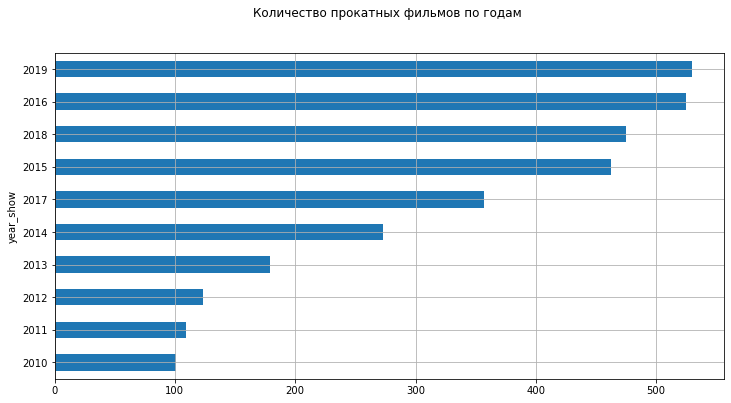

In [86]:
# построим график количества прокатных фильмов с группировкой по году выхода в эфир на основе данных среза df_year 
display(
    df_year
    .groupby('year_show')['puNumber']
    .count()
    .sort_values()
    .plot(title='Количество прокатных фильмов по годам \n\n', 
         kind='barh', grid=True, figsize=(12,6))
);

#### Второй способ - подсчет статистики проката по годам и доли таких фильмов через промежуточный столбец

Создадим дополнительный столбец `show_true`, хранящий признак проката в кинотеатере в виде значения `True`

In [87]:
# создадим дополнительный столбец, хранящий признак проката 
df_mvsh['show_true'] = (~np.isnan(df_mvsh['puNumber']) 
                        & ~np.isnan(df_mvsh['box_office']) 
                        & df_mvsh['box_office'] > 0)

In [88]:
# выведем сводную таблицу с данными о количестве прокатов в кинотеатрах и их доли от общего количества фильмов
display(
    df_mvsh
    .pivot_table(index='year_show', values='show_true', aggfunc=['sum', 'mean'])
    .style.format({('mean', 'show_true'): '{:.2%}'})
);

,sum,mean
,show_true,show_true
year_show,,
2010,101,10.25%
2011,109,17.52%
2012,123,20.74%
2013,179,28.41%
2014,273,33.87%
2015,462,65.53%
2016,525,64.18%
2017,357,70.69%


<AxesSubplot:title={'center':'Количество прокатных фильмов по годам \n\n'}, ylabel='year_show'>

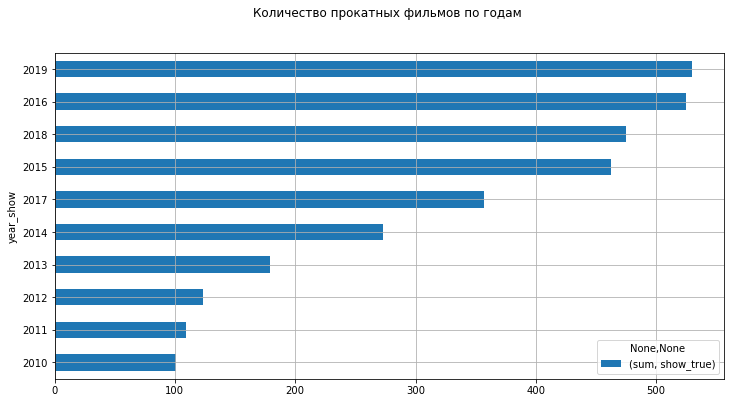

In [89]:
# выведем график с сортировкой по убыванию количества прокатных фильмов по годам 
display(
    df_mvsh
    .pivot_table(index='year_show', values='show_true', aggfunc=['sum', 'mean'])
    .sort_values(by=('sum','show_true'))
    .plot(title='Количество прокатных фильмов по годам \n\n', 
          grid=True, kind='barh', y=('sum','show_true'), figsize=(12, 6))
);

<AxesSubplot:title={'center':'Количество прокатных фильмов по годам \n\n'}, xlabel='year_show'>

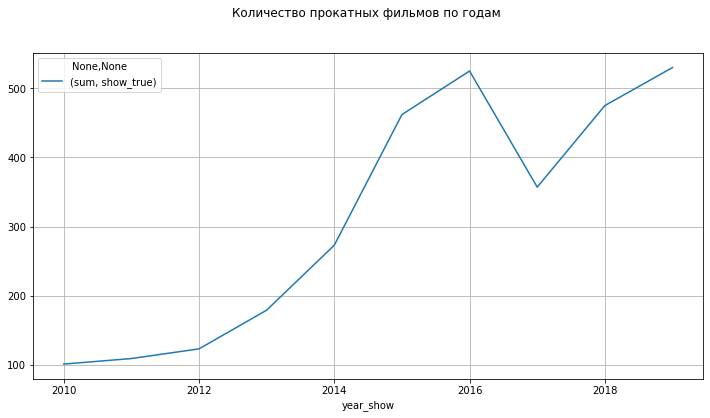

In [90]:
# выведем график динамики количества прокатных фильмов по годам 
display(
    df_mvsh
    .pivot_table(index='year_show', values='show_true', aggfunc=['sum', 'mean'])
    .plot(title='Количество прокатных фильмов по годам \n\n', 
          grid=True, y=('sum','show_true'), figsize=(12, 6))
);

**Вывод по количеству прокатных фильмов по годам:**  
- Наибольшее количество прокатных фильмов было в 2019 и 2016 годах 
- Наименьшее количество прокатных фильмлв было в 2010 году
- Увеличение количества прокатных фильмов было с 2010 по 2016 год, затем было падение в 2017 году и далее подъем количества в 2019 году

<AxesSubplot:title={'center':'Доля прокатных фильмов от общего числа фильмов по годам \n\n'}, ylabel='year_show'>

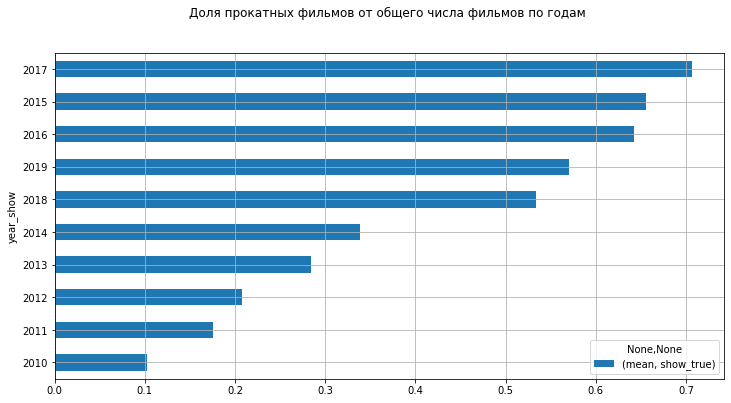

In [91]:
display(
    df_mvsh
    .pivot_table(index='year_show', values='show_true', aggfunc=['sum', 'mean'])
    .sort_values(by=('mean','show_true'))
    .plot(title='Доля прокатных фильмов от общего числа фильмов по годам \n\n', 
          grid=True, kind='barh', y=('mean','show_true'), figsize=(12, 6))
);

<AxesSubplot:title={'center':'Доля прокатных фильмов от общего числа фильмов по годам \n\n'}, xlabel='year_show'>

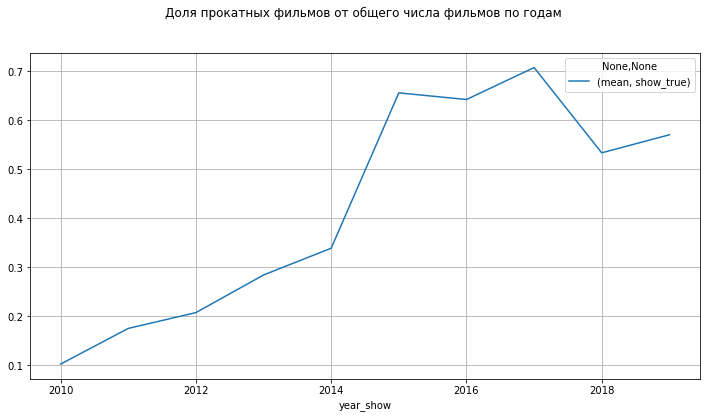

In [92]:
display(
    df_mvsh
    .pivot_table(index='year_show', values='show_true', aggfunc=['sum', 'mean'])
    .plot(title='Доля прокатных фильмов от общего числа фильмов по годам \n\n', 
          grid=True, y=('mean','show_true'), figsize=(12, 6))
);

**Вывод по доле прокатных фильмов от общего числа фильмов по годам:**  
- Наибольшая доля прокатных фильмов была в 2017 году 
- Наименьшая доля прокатных фильмлв была в 2010 году
- Увеличение доли прокатных фильмов было с 2010 по 2015 год, затем было небольшое уменьшение доли в 2016 году, далее подъем доли в 2017 году и снова резкое падение в 2018 на уровень ниже 2015 года. В 2019 году видим небольшое увеление доли по сравнению с 2018 годом 

### Динамика проката по годам - сумма сборов

In [93]:
# для подчета финансовой динамики сборов по годам воспользуемся срезом df_year и столбцом box_office_mln со значениями в млн 
display(
    df_year
    .pivot_table(index='year_show', values='box_office_mln', aggfunc=['sum', 'median', 'mean'])
    .sort_values(by=('sum','box_office_mln'))
);

,sum,median,mean
,box_office_mln,box_office_mln,box_office_mln
year_show,,,
2010,2.428654,0.001710,0.024046
2012,6.955423,0.006220,0.056548
2011,14.102765,0.003000,0.129383
2013,29.799706,0.003580,0.166479
2014,7444.951859,0.020400,27.270886
2015,39497.365196,5.003450,85.492132
2016,47866.299742,3.915041,91.173904
2019,48425.708780,4.627798,91.369262


<AxesSubplot:title={'center':'Сумма сборов по годам - по убыванию \n\n'}, ylabel='year_show'>

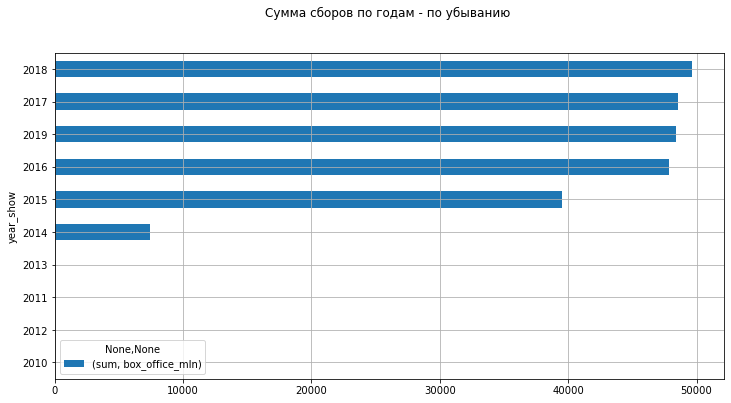

In [94]:
# построим график финансовой динамики сборов по годам  
display(
    df_year
    .pivot_table(index='year_show', values='box_office_mln', aggfunc=['sum', 'median', 'mean'])
    .sort_values(by=('sum','box_office_mln'))
    .plot(title='Сумма сборов по годам - по убыванию \n\n', 
          grid=True, kind='barh', y=('sum','box_office_mln'), figsize=(12, 6))
);

<AxesSubplot:title={'center':'Сумма сборов по годам - динамика \n\n'}, xlabel='year_show'>

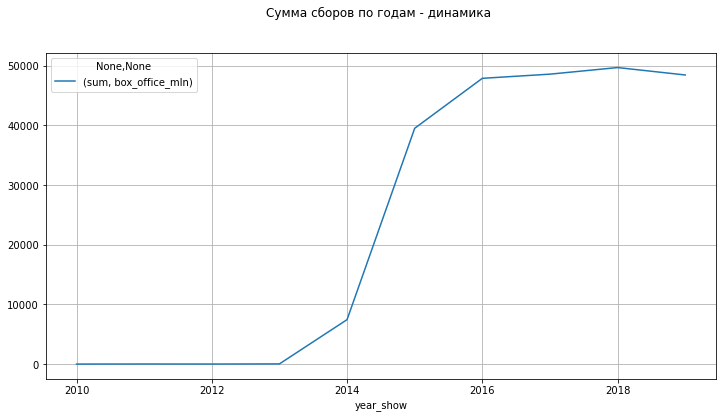

In [95]:
# график динамики сборов по годам 
display(
    df_year
    .pivot_table(index='year_show', values='box_office_mln', aggfunc=['sum', 'median', 'mean'])
    .plot(title='Сумма сборов по годам - динамика \n\n', 
          grid=True, y=('sum','box_office_mln'), figsize=(12, 6))
);

Сумма сборов была максимальной в 2018 году (суммарный размер сборов составил 49 668). С 2010 по 2013 годы в представленных данных содержатся минимальные суммы сборов от 2 до 30 млн.  Наичная с 2014 года можем наблюдать рост суммы сборов до 2018 года, после которого идет небольшое снижение 

### Средняя и медианная сумма сборов для каждого года 

Средняя и медианная сумма сборов для каждого года в сводной таблице представлены выше. 

Выведем для каждой величины отдельные графики 

<AxesSubplot:title={'center':'Медианное значение сборов по годам - по убыванию \n\n'}, ylabel='year_show'>

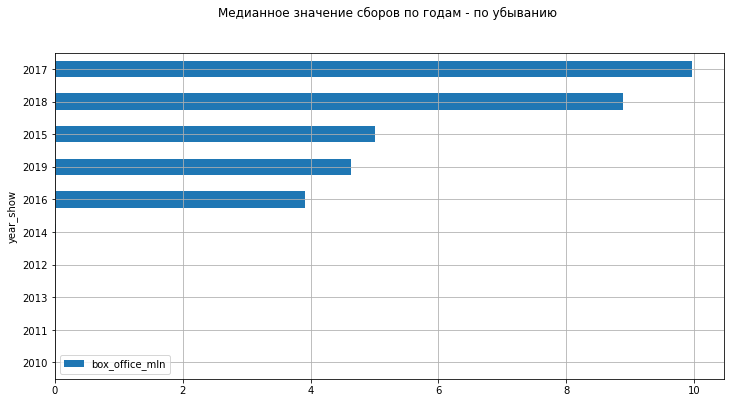

In [96]:
# выведем график медианы сборов по годам 
display(
    df_year
    .pivot_table(index='year_show', values='box_office_mln', aggfunc='median')
    .sort_values(by=('box_office_mln'))
    .plot(title='Медианное значение сборов по годам - по убыванию \n\n', 
          grid=True, kind='barh', figsize=(12, 6))
);

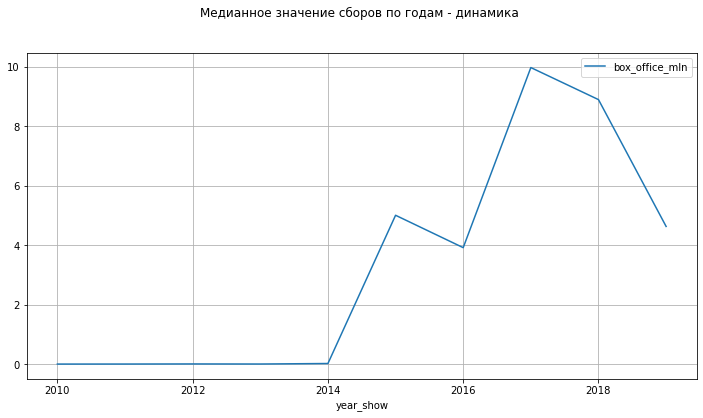

In [97]:
# выведем график динамики сборов по годам
(
    df_year
    .pivot_table(index='year_show', values='box_office_mln', aggfunc='median')
    .plot(title='Медианное значение сборов по годам - динамика \n\n', 
          grid=True, figsize=(12, 6))
);

Медианная сумма сборов была максимальной в 2017 году (около 10 млн). С 2010 по 2014 годы в представленных данных содержатся минимальные медианные суммы сборов не превышающие 0.020400.  Наичная с 2014 года можем наблюдать рост медианной суммы сборов до 2017 года с небольшим поижением в 2016 году. Также видим резкое падение медианной суммы сборов в 2019 году 

<AxesSubplot:title={'center':'Среднее значение сборов по годам - по убыванию \n\n'}, ylabel='year_show'>

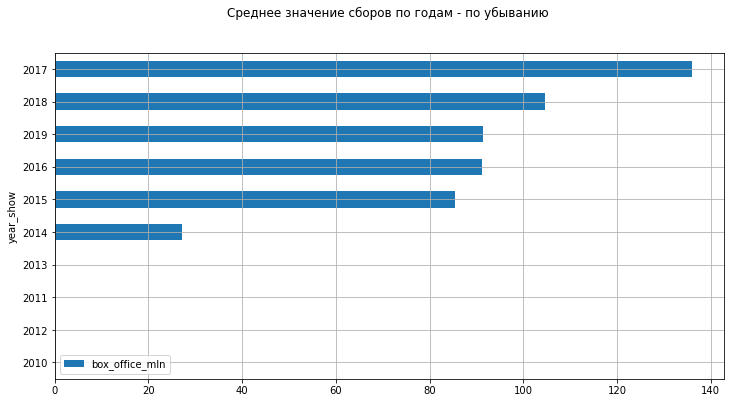

In [98]:
# построим график для среднего значения сборов по годам  
display(
    df_year
    .pivot_table(index='year_show', values='box_office_mln', aggfunc='mean')
    .sort_values(by=('box_office_mln'))
    .plot(title='Среднее значение сборов по годам - по убыванию \n\n', 
          grid=True, kind='barh', figsize=(12, 6))
);

<AxesSubplot:title={'center':'Среднее значение сборов по годам  - динамика \n\n'}, xlabel='year_show'>

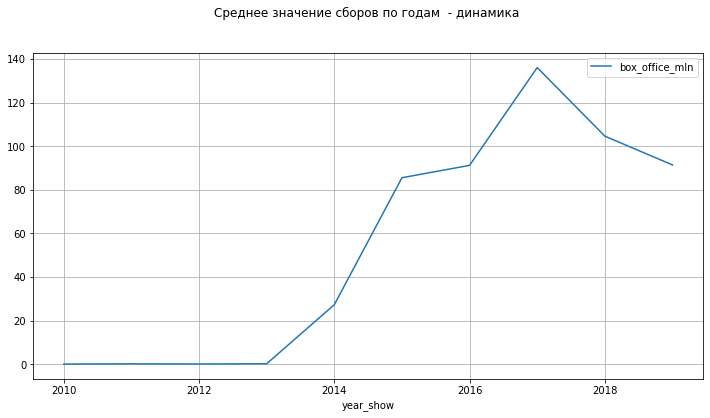

In [99]:
# построим график динамики для среднего значения сборов по годам  
display(
    df_year
    .pivot_table(index='year_show', values='box_office_mln', aggfunc='mean')
    .plot(title='Среднее значение сборов по годам  - динамика \n\n', 
          grid=True, figsize=(12, 6))
);

Средняя сумма сборов была максимальной в 2017 году (около 136 млн). С 2010 по 2013 годы в представленных данных содержатся минимальные средние суммы сборов не превышающие 0.166479.  Наичная с 2014 года можем наблюдать рост средней суммы сборов до 2017 года, после чего видим снижение средней суммы сборов в 2018 и 2019 годах 

In [100]:
df_year['box_office_mln'].describe()


count    3134.000000
mean       77.064366
std       241.178384
min         0.000040
25%         0.101029
50%         2.409099
75%        24.569795
max      3073.568691
Name: box_office_mln, dtype: float64

In [101]:
df_year.loc[df_year['year_show'] == 2017, 'box_office_mln'].describe()

count     357.000000
mean      136.032793
std       323.251441
min         0.007900
25%         1.951257
50%         9.968340
75%        71.173828
max      2779.686144
Name: box_office_mln, dtype: float64

### Влияние возрастного ограничения на сумму сборов

In [102]:
# для подсчета влияния возрастного ограничения на сумму сборов
# воспользуемся срезом df_year и столбцом box_office_mln со значениями в млн 

display(
    df_year.loc[(df_year['year_show'] >= 2015) & (df_year['year_show'] <= 2019)]
    .pivot_table(index='year_show', columns='age_restriction', values='box_office_mln', aggfunc='sum')
);

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
year_show,,,,,
2015,379.054578,13616.082009,11368.120870,5432.308367,8701.799371
2016,150.228849,12204.446524,16664.548542,6793.929819,12053.146008
2017,229.598930,7851.427661,18745.042900,9651.495581,12086.142146
2018,32.449002,14267.291661,16503.602347,8760.085501,10104.974623
2019,17.746067,12680.198774,12753.418985,10121.796304,12852.548651


<AxesSubplot:title={'center':'Влияние возрастного ограничения на сумму сборов по годам  - динамика \n\n'}, xlabel='year_show'>

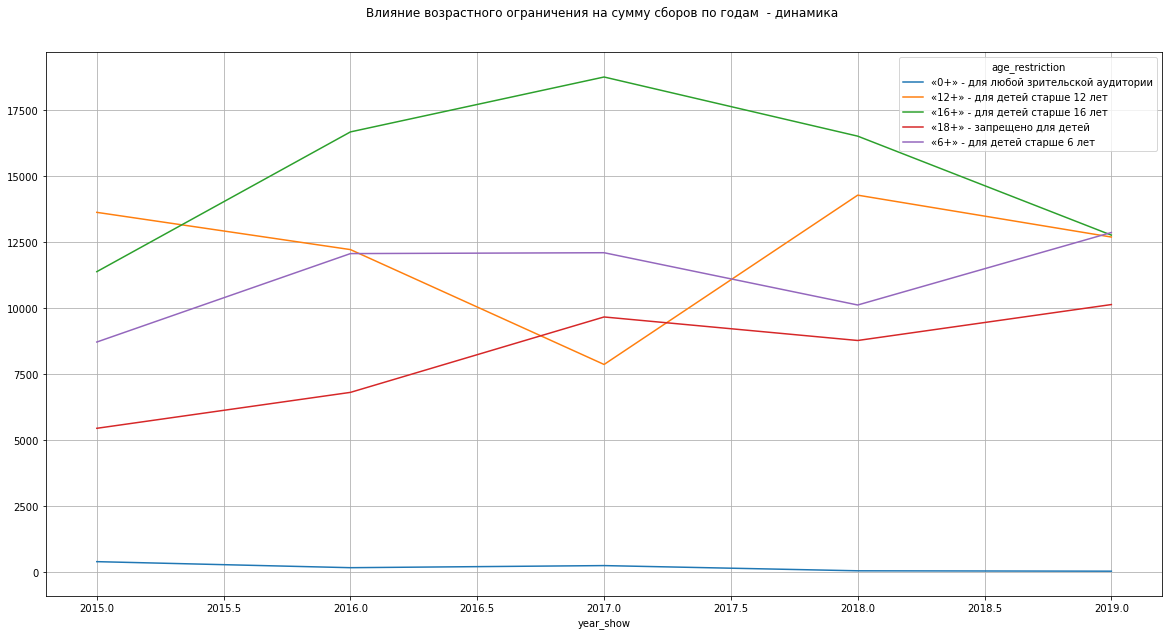

In [103]:
# построим линейные графики динамики влияния возрастных ограничений на сумму сборов 
display(
    df_year.loc[(df_year['year_show'] >= 2015) & (df_year['year_show'] <= 2019)]
    .pivot_table(index='year_show', columns='age_restriction', values='box_office_mln', aggfunc='sum')
  #  .sort_values(by=('sum','box_office_mln'))
    .plot(title='Влияние возрастного ограничения на сумму сборов по годам  - динамика \n\n', 
          grid=True, figsize=(20, 10))
);

In [104]:
# подсчитаем число фильмов по годам в разбивке по возрастным ограничениям 

display(
    df_year.loc[(df_year['year_show'] >= 2015) & (df_year['year_show'] <= 2019)]
    .pivot_table(index='year_show', columns='age_restriction', values='puNumber', aggfunc='count')
);

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
year_show,,,,,
2015,38,72,167,132,53
2016,41,82,181,151,70
2017,3,41,121,147,45
2018,5,67,156,179,68
2019,3,85,178,183,81


In [105]:
# подсчитаем медианное значение рейтинга по годам в разбивке по возрастным ограничениям 

display(
    df_year.loc[(df_year['year_show'] >= 2015) & (df_year['year_show'] <= 2019)]
    .pivot_table(index='year_show', columns='age_restriction', values='ratings', aggfunc='median')
);

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
year_show,,,,,
2015,5.20,6.60,6.20,6.3,6.20
2016,7.15,6.10,6.15,6.3,6.30
2017,5.30,6.35,6.35,6.2,6.30
2018,7.85,6.50,6.40,6.3,6.40
2019,7.20,6.50,6.40,6.2,6.55


In [106]:
# подсчитаем среднее значение сборов по годам в разбивке по возрастным ограничениям 

display(
    df_year.loc[(df_year['year_show'] >= 2015) & (df_year['year_show'] <= 2019)]
    .pivot_table(index='year_show', columns='age_restriction', values='box_office_mln', aggfunc='mean')
);

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
year_show,,,,,
2015,9.975120,189.112250,68.072580,41.153851,164.184894
2016,3.664118,148.834714,92.069329,44.992913,172.187800
2017,76.532977,191.498236,154.917710,65.656433,268.580937
2018,6.489800,212.944652,105.792323,48.939025,148.602568
2019,5.915356,149.178809,71.648421,55.310362,158.673440


<AxesSubplot:title={'center':'Влияние возрастного ограничения на среднюю сумму сборов по годам  - динамика \n\n'}, xlabel='year_show'>

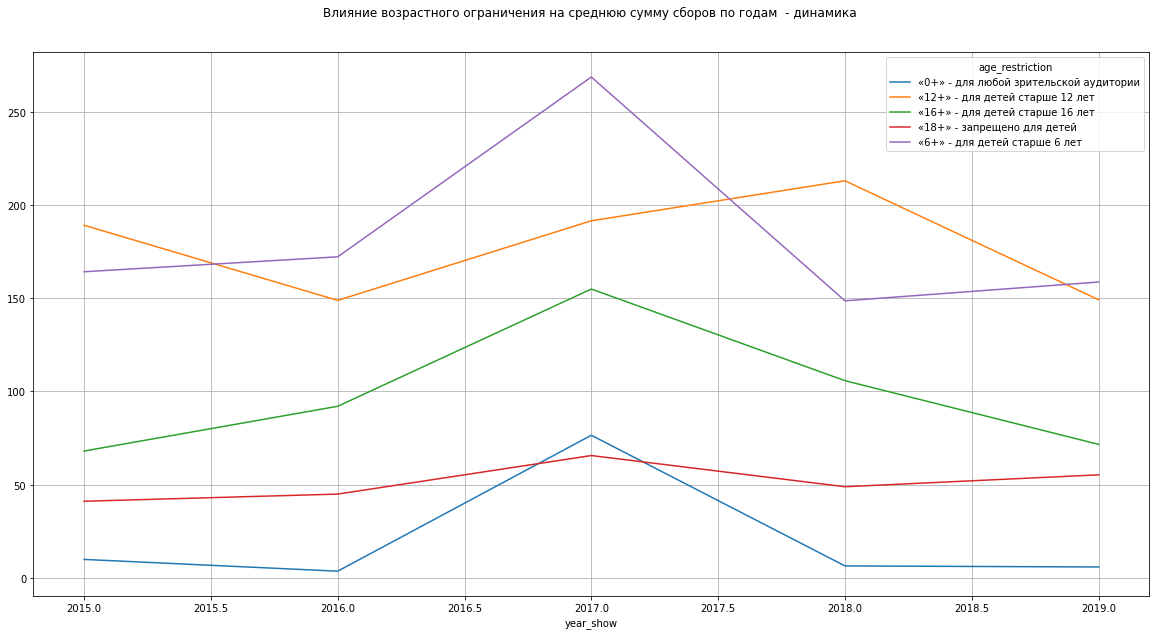

In [107]:
# построим линейные графики динамики влияния возрастных ограничений на сумму сборов 
display(
    df_year.loc[(df_year['year_show'] >= 2015) & (df_year['year_show'] <= 2019)]
    .pivot_table(index='year_show', columns='age_restriction', values='box_office_mln', aggfunc='mean')
  #  .sort_values(by=('sum','box_office_mln'))
    .plot(title='Влияние возрастного ограничения на среднюю сумму сборов по годам  - динамика \n\n', 
          grid=True, figsize=(20, 10))
);

In [108]:
# подсчитаем медианное значение сборов по годам в разбивке по возрастным ограничениям 

display(
    df_year.loc[(df_year['year_show'] >= 2015) & (df_year['year_show'] <= 2019)]
    .pivot_table(index='year_show', columns='age_restriction', values='box_office_mln', aggfunc='median')
);

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
year_show,,,,,
2015,2.949809,15.959668,4.784782,4.616615,20.380982
2016,2.571294,4.690635,5.180851,6.107002,3.026256
2017,22.178956,9.010548,9.702077,8.212677,51.992103
2018,3.616937,8.931966,9.010639,7.179466,14.688850
2019,3.885435,3.405546,3.210718,5.603217,12.875350


<AxesSubplot:title={'center':'Влияние возрастного ограничения на медианное значение сборов по годам  - динамика \n\n'}, xlabel='year_show'>

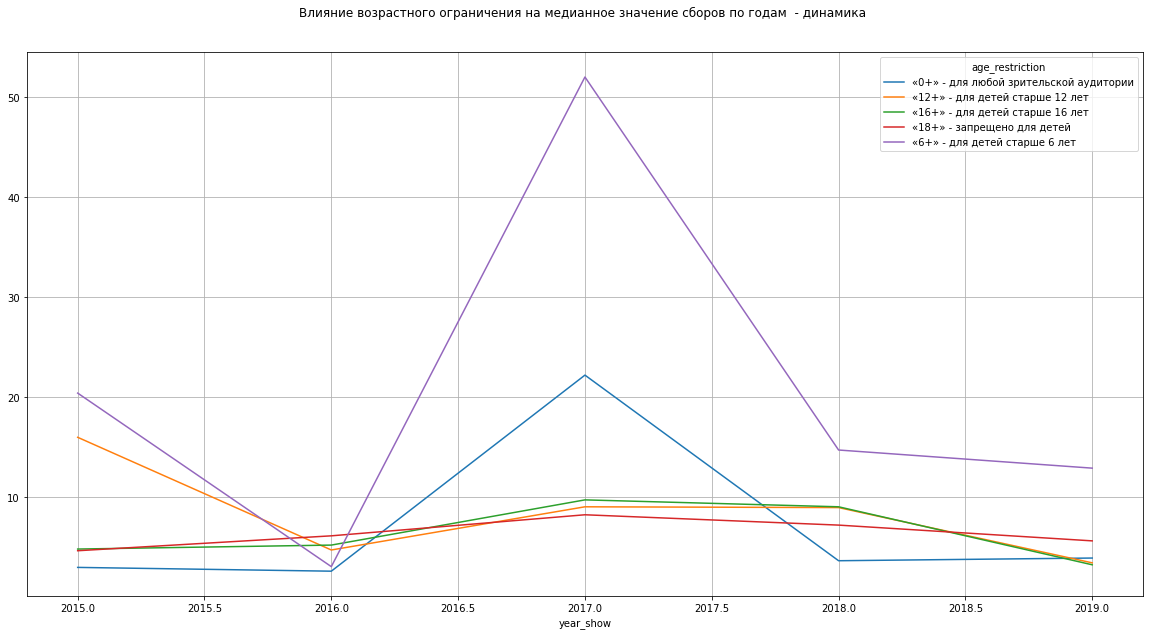

In [109]:
# построим линейные графики динамики влияния возрастных ограничений на медианное  значение сборов 
display(
    df_year.loc[(df_year['year_show'] >= 2015) & (df_year['year_show'] <= 2019)]
    .pivot_table(index='year_show', columns='age_restriction', values='box_office_mln', aggfunc='median')
  #  .sort_values(by=('sum','box_office_mln'))
    .plot(title='Влияние возрастного ограничения на медианное значение сборов по годам  - динамика \n\n', 
          grid=True, figsize=(20, 10))
);

Из таблицы и графиков можно сделать следующие выводы: 
- из графиков между средними и медианными сборами по годам у нас получилась очень большая разница в размерах сборов - из чего следует что есть редкие значения больших кассовых сборов, которые не позволяют получить оценку для типичной картины. И правильней при выявлении типичных закономерностей ориентироваться на медианное значение, которое отражает наиболее часто встречающееся среднее.  

Исходя из графика медиан можно сделать вывод: 
- за исключением 2016 года, лидером по величине кассовых сборов можно считать категорию 6+, при том что общее количество фильмов по годам меньше чем в некоторых других категориях (например, 16+ и 18+). Из этого можно сделать вывод, что такие фильмы наиболее интересны для просмотра в кинотеатрах 
- категории 12+, 16+, 18+ находятся примерно на одном уровне по сборам 
- в категория 0+ за исключением 2017 года, меньше всего сборов из всех категорий. При том, что медианный рейтинг этой категории выше чем в других, а количество фильмов - меньше, то можно сделать вывод, что причина малых сборов именно в малом коичестве снимаемых фильмов. 



## Шаг 4. Исследование фильмов, которые получили государственную поддержку

Для исследования проката фильмов по годам создадим срез, которые будет включать следующие записи: 
- есть данные о прокатном удостоверении (`puNumber` без пропусков)
- общий бюджет фильма имеет данные, что является признаком наличия государтсвенной поддержки (`budget` без пропусков)

In [110]:
df_gov = df_mvsh.loc[(~df_mvsh['puNumber'].isna()) 
                    & (~df_mvsh['budget'].isna())] 

print('Количество фильмов с гос поддержкой: ', df_gov.shape[0])
print('Количество фильмов с гос поддержкой и ненулевым сбором от проката: ', 
      df_gov.loc[df_gov['box_office_mln'] > 0].shape[0])
print('Количество фильмов с гос поддержкой и с незаданным сбором от проката: ', 
      df_gov.loc[df_gov['box_office_mln'].isna()].shape[0])

Количество фильмов с гос поддержкой:  332
Количество фильмов с гос поддержкой и ненулевым сбором от проката:  318
Количество фильмов с гос поддержкой и с незаданным сбором от проката:  14


Среди фильмов с гос поддержкой есть 14 фильмов, для которых нет сведений о сборов после проката. Данные фильмы не представляют интерес для исследования, поэтому исключим их из датасета `df_gov`

In [111]:
# оставим в датасете только фильмы с гом поддержкой с заполненными сборами
df_gov = df_gov.loc[~df_gov['box_office_mln'].isna()]
print('Количество фильмов с гос поддержкой и с заданными сборами после проката: ', df_gov.shape[0])

Количество фильмов с гос поддержкой и с заданными сборами после проката:  318


In [112]:
print('Года, для которых есть данные о фильмах с гос поддержкой и с заданными сборами после проката: \n',
      df_gov['year_show'].sort_values().unique())

Года, для которых есть данные о фильмах с гос поддержкой и с заданными сборами после проката: 
 [2013 2014 2015 2016 2017 2018 2019]


В исследуемый временной промежутое попадают фильмы за 2013-2019 года 

### Количество прокатных фильмов по годам для фильмов с гос поддержкой

Изучим как менялось по годам количество фильмов с гос поддержкой, выходящих в прокат

In [113]:
# выведем сводную таблицу с данными о количестве прокатов в кинотеатрах на основе данных среза df_gov
display(
    df_gov
    .pivot_table(index='year_show', values='puNumber', aggfunc='count')
);

,puNumber
year_show,
2013,2
2014,16
2015,85
2016,60
2017,39
2018,56
2019,60


<AxesSubplot:title={'center':'Количество прокатных фильмов c гос поддержкой по годам \n\n'}, ylabel='year_show'>

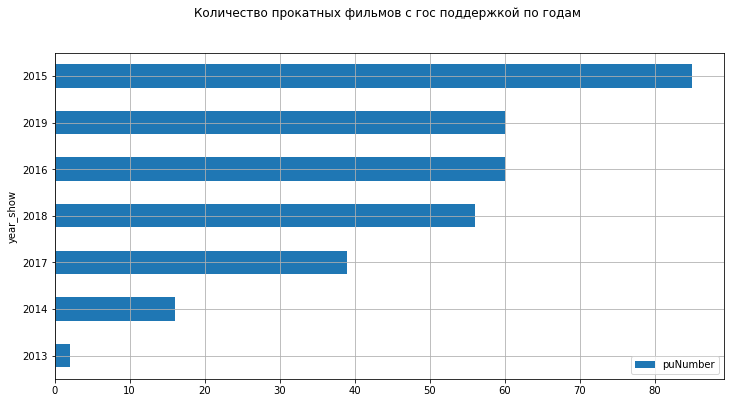

In [114]:
# выведем график с сортировкой по убыванию количества прокатных фильмов по годам 
display(
    df_gov
    .pivot_table(index='year_show', values='puNumber', aggfunc='count')
    .sort_values(by=('puNumber'))
    .plot(title='Количество прокатных фильмов c гос поддержкой по годам \n\n', 
          grid=True, kind='barh', figsize=(12, 6))
)

<AxesSubplot:title={'center':'Количество прокатных фильмов с гос поддержклой по годам \n\n'}, xlabel='year_show'>

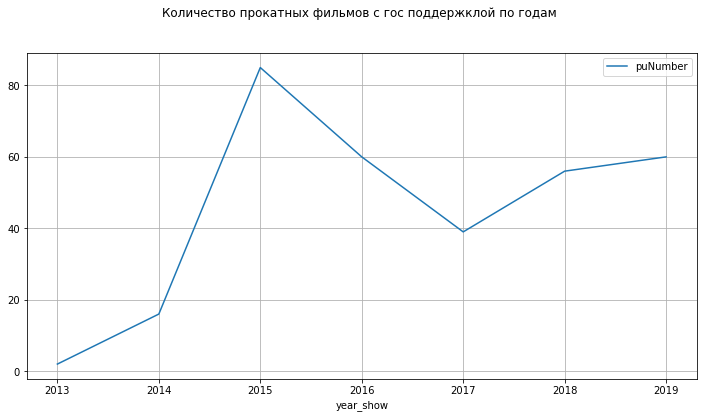

In [115]:
# выведем график динамики количества прокатных фильмов по годам 
display(
    df_gov
    .pivot_table(index='year_show', values='puNumber', aggfunc='count')
    .plot(title='Количество прокатных фильмов с гос поддержклой по годам \n\n', 
          grid=True, figsize=(12, 6))
);

**Вывод по количеству прокатных фильмов с гос поддержкой по годам:**  
- Наибольшее количество фильмов было в 2015 году - 85  
- Наименьшее количество фильмлв было в 2013 году - 2
- Увеличение количества прокатных фильмов было с 2013 по 2015 год, затем было падение в 2016 и 2017 годах и далее подъем количества в 2018 и 2019 годах до 60 фильмов

### Объем общего бюджета по годам для фильмов с гос поддержкой

Изучим как менялось по годам общий объем бюджета фильмов с гос поддержкой, выходящих в прокат

In [116]:
# выведем сводную таблицу с данными о сумме общего бюджета на основе данных среза df_gov
display(
    df_gov
    .pivot_table(index='year_show', values='budget_mln', aggfunc='sum')
    .sort_values(by=('budget_mln'))
);

,budget_mln
year_show,
2013,255.435390
2014,1302.484783
2017,6951.572568
2018,7000.664099
2016,7536.236668
2015,7696.670223
2019,11235.073892


<AxesSubplot:title={'center':'Объем общего бюджета фильмов c гос поддержкой по годам \n\n'}, ylabel='year_show'>

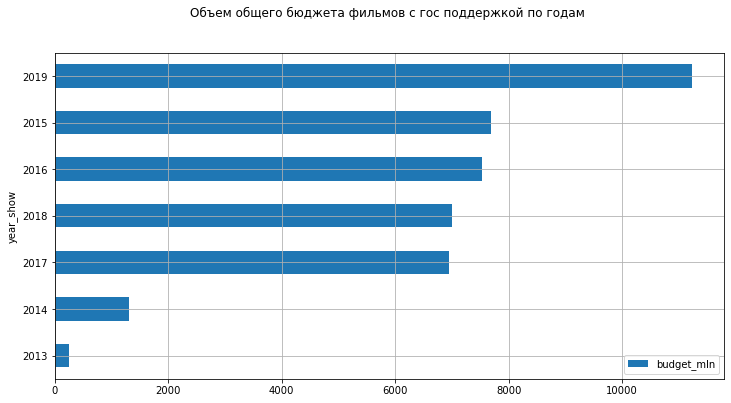

In [117]:
# выведем график с сортировкой по убыванию объема бюджета фильмов по годам 
display(
    df_gov
    .pivot_table(index='year_show', values='budget_mln', aggfunc='sum')
    .sort_values(by=('budget_mln'))
    .plot(title='Объем общего бюджета фильмов c гос поддержкой по годам \n\n', 
          grid=True, kind='barh', figsize=(12, 6))
)

<AxesSubplot:title={'center':'Объем общего бюджета фильмов c гос поддержкой по годам \n\n'}, xlabel='year_show'>

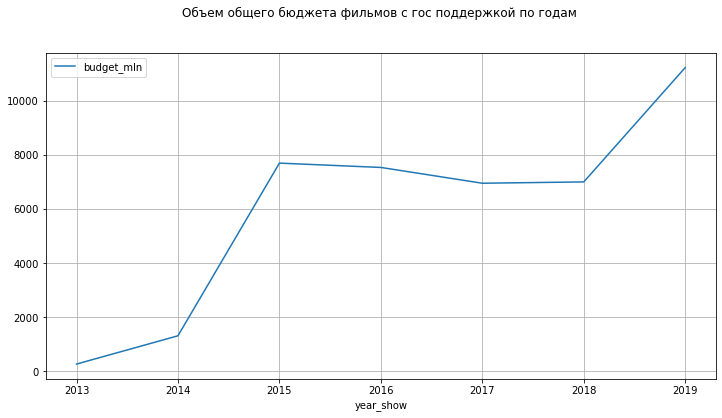

In [118]:
# выведем график динамики объема бюджета фильмов по годам 
display(
    df_gov
    .pivot_table(index='year_show', values='budget_mln', aggfunc='sum')
    .plot(title='Объем общего бюджета фильмов c гос поддержкой по годам \n\n', 
          grid=True, figsize=(12, 6))
)

**Вывод по объему бюджета фильмов с гос поддержкой по годам:**  
- Наибольший объем общего бюджета был в 2019 году - 11 235 млн 
- Наименьший объем общего бюджета был в 2013 году - 255 млн
- Вцелом видим тенденцию у величению объема бюджета на протяжении всех годов

### Объем общего бюджета по источнику финансирования для фильмов с гос поддержкой

Изучим как менялось по источнику финансирования общий объем бюджета фильмов с гос поддержкой, выходящих в прокат

In [119]:
# выведем сводную таблицу с данными об общем объеме финансирования по источнику финансирования
display(
    df_gov
    .pivot_table(index='financing_source', values='budget_mln', aggfunc='sum')
    .sort_values(by=('budget_mln'))
);

,budget_mln
financing_source,
"Министерство культуры, Фонд кино",2649.309609
Министерство культуры,10915.253479
Фонд кино,28413.574535


**Вывод по объему бюджета фильмов с гос поддержкой по источнику финансирования:**  
- Наибольший объем бюджета выделялся  Фонд кино	- 28 413.574535 млн 
- Наименьший объем бюджеты выделялся Министерство культуры, Фонд кино	- 2 649.309609 млн


### Объем возвратного бюджета по годам для фильмов с гос поддержкой

Изучим как менялось по годам refundable_support_mln фильмов с гос поддержкой, выходящих в прокат

In [120]:
# выведем сводную таблицу с данными о количестве прокатов в кинотеатрах на основе данных среза df_gov
display(
    df_gov
    .pivot_table(index='year_show', values='refundable_support_mln', aggfunc='sum')
    .sort_values(by=('refundable_support_mln'))
);

,refundable_support_mln
year_show,
2013,0.000000
2014,71.000000
2015,637.153119
2018,662.000000
2017,719.346881
2019,788.000000
2016,921.500000


<AxesSubplot:title={'center':'Объем возвратных средств гос поддержки фильмов c гос поддержкой по годам \n\n'}, ylabel='year_show'>

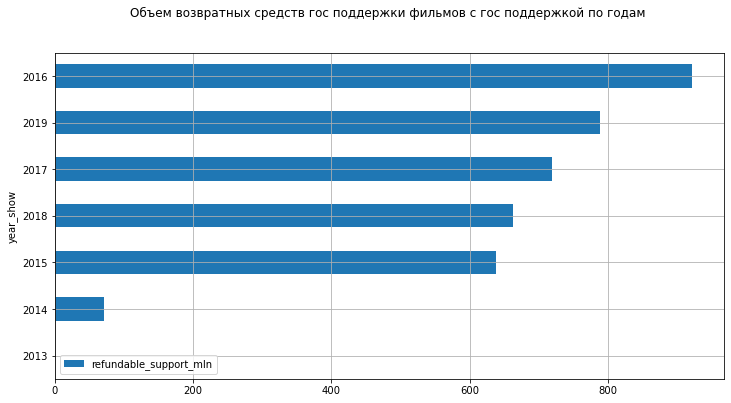

In [121]:
# выведем график с сортировкой по убыванию refundable_support_mln фильмов по годам 
display(
    df_gov
    .pivot_table(index='year_show', values='refundable_support_mln', aggfunc='sum')
    .sort_values(by=('refundable_support_mln'))
    .plot(title='Объем возвратных средств гос поддержки фильмов c гос поддержкой по годам \n\n', 
          grid=True, kind='barh', figsize=(12, 6))
)

<AxesSubplot:title={'center':'Объем возратных средств фильмов c гос поддержкой по годам \n\n'}, xlabel='year_show'>

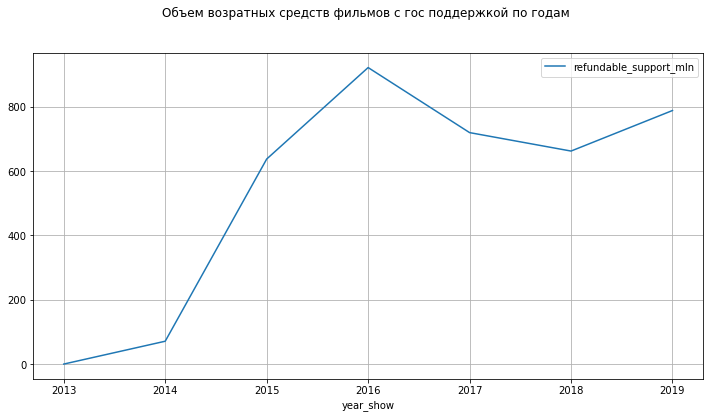

In [122]:
# выведем график динамики refundable_support_mln фильмов по годам 
display(
    df_gov
    .pivot_table(index='year_show', values='refundable_support_mln', aggfunc='sum')
    .plot(title='Объем возратных средств фильмов c гос поддержкой по годам \n\n', 
          grid=True, figsize=(12, 6))
)

**Вывод по возвратным средствам гос поддержки фильмов с гос поддержкой по годам:**  
- Наибольший объем возвратных средств был в 2016 году - 921.5 млн 
- Наименьший объем возвратных средств был  в 2013 году - 0 млн
- Вцелом видим тенденцию у величению объема бюджета на протяжении всех годов, за исключенрием небольшого снижения в 2017 и 2018 годах

### Объем невозвратных средств по годам для фильмов с гос поддержкой

Изучим как менялось по годам nonrefundable_support_mln фильмов с гос поддержкой, выходящих в прокат

In [123]:
# выведем сводную таблицу с данными о сумме невозвратных средств на основе данных среза df_gov
display(
    df_gov
    .pivot_table(index='year_show', values='nonrefundable_support_mln', aggfunc='sum')
    .sort_values(by=('nonrefundable_support_mln'))
);

,nonrefundable_support_mln
year_show,
2013,134.347945
2014,501.002299
2017,2429.624781
2018,2784.969465
2015,2994.088340
2019,3298.000000
2016,3370.135482


<AxesSubplot:title={'center':'Объем невозвратных средств гос поддержки фильмов c гос поддержкой по годам \n\n'}, ylabel='year_show'>

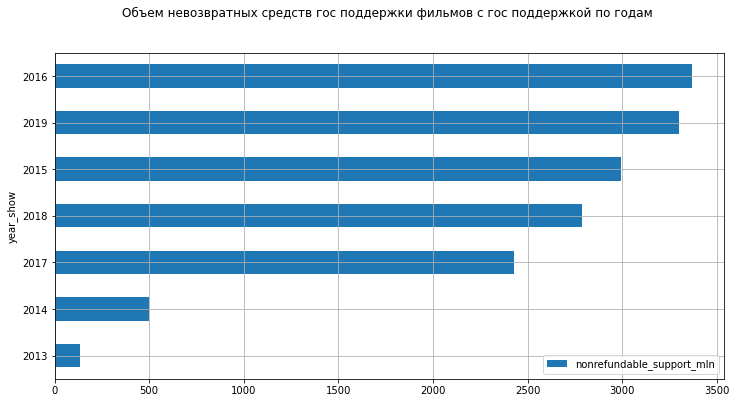

In [124]:
# выведем график с сортировкой по убыванию nonrefundable_support_mln фильмов по годам 
display(
    df_gov
    .pivot_table(index='year_show', values='nonrefundable_support_mln', aggfunc='sum')
    .sort_values(by=('nonrefundable_support_mln'))
    .plot(title='Объем невозвратных средств гос поддержки фильмов c гос поддержкой по годам \n\n', 
          grid=True, kind='barh', figsize=(12, 6))
)

<AxesSubplot:title={'center':'Объем невозратных средств фильмов c гос поддержкой по годам \n\n'}, xlabel='year_show'>

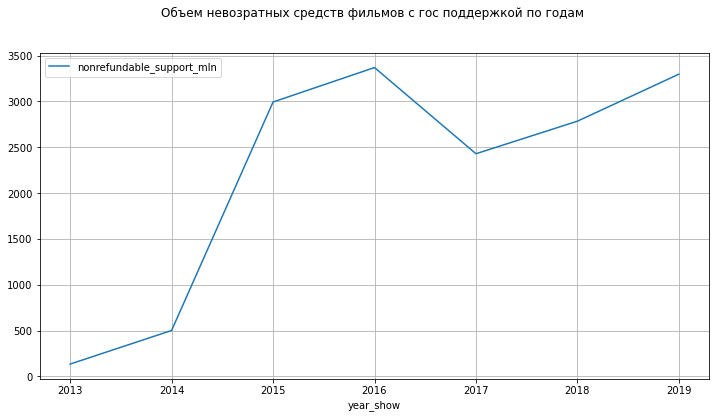

In [125]:
# выведем график динамики nonrefundable_support_mln фильмов по годам 
display(
    df_gov
    .pivot_table(index='year_show', values='nonrefundable_support_mln', aggfunc='sum')
    .plot(title='Объем невозратных средств фильмов c гос поддержкой по годам \n\n', 
          grid=True, figsize=(12, 6))
)

**Вывод по невозвратным средствам гос поддержки фильмов с гос поддержкой по годам:**  
- Наибольший объем невозвратных средств был в 2016 году - 3 370 млн 
- Наименьший объем невозвратных средств был  в 2013 году - 134.34 млн
- Вцелом видим тенденцию у величению объема бюджета на протяжении всех годов, за исключенрием небольшого снижения в 2017 и 2018 годах

### Объем средств гос бюджета по годам для фильмов с гос поддержкой

Изучим как менялось по годам nonrefundable_support_mln + nrefundable_support_mln для фильмов с гос поддержкой, выходящих в прокат

In [126]:
# создадим новый столбец, который содержит только средства бюджета 

df_gov['gov_support'] = df_gov['refundable_support_mln'] + df_gov['nonrefundable_support_mln']

# выведем сводную таблицу с данными о сумме средств гос бюджета на основе данных среза df_gov
display(
    df_gov
    .pivot_table(index='year_show', values='gov_support', aggfunc='sum')
    .sort_values(by=('gov_support'))
);

,gov_support
year_show,
2013,134.347945
2014,572.002299
2017,3148.971662
2018,3446.969465
2015,3631.241459
2019,4086.000000
2016,4291.635482


<AxesSubplot:title={'center':'Объем общих средств гос поддержки фильмов c гос поддержкой по годам \n\n'}, ylabel='year_show'>

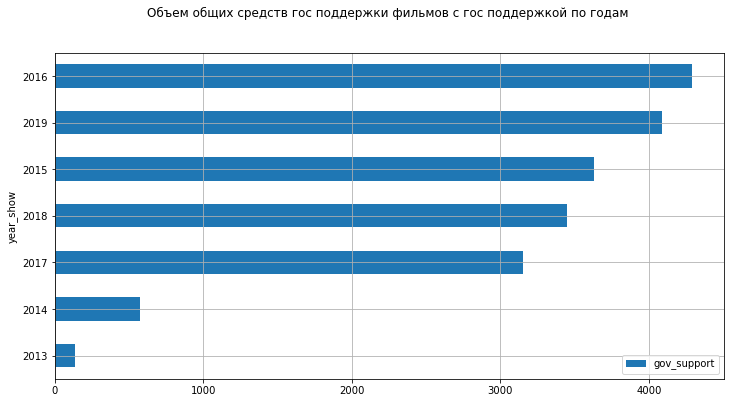

In [127]:
# выведем график с сортировкой по убыванию gov_support фильмов по годам 
display(
    df_gov
    .pivot_table(index='year_show', values='gov_support', aggfunc='sum')
    .sort_values(by=('gov_support'))
    .plot(title='Объем общих средств гос поддержки фильмов c гос поддержкой по годам \n\n', 
          grid=True, kind='barh', figsize=(12, 6))
)

<AxesSubplot:title={'center':'Объем всего гос средств фильмов c гос поддержкой по годам \n\n'}, xlabel='year_show'>

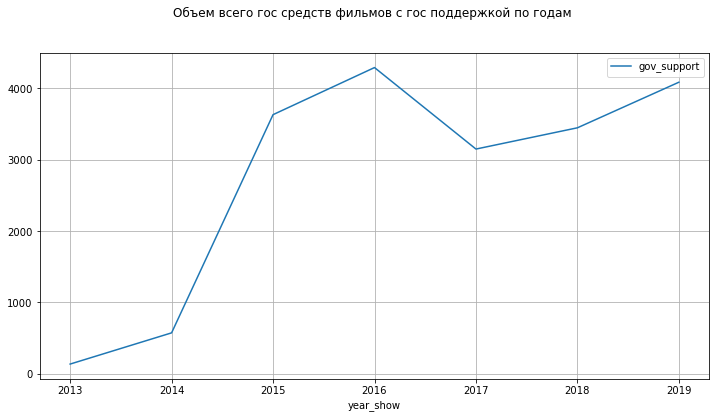

In [128]:
# выведем график динамики gov_support фильмов по годам 
display(
    df_gov
    .pivot_table(index='year_show', values='gov_support', aggfunc='sum')
    .plot(title='Объем всего гос средств фильмов c гос поддержкой по годам \n\n', 
          grid=True, figsize=(12, 6))
)

**Вывод по средствам гос бюджета для фильмов с гос поддержкой по годам:**  
- Наибольший объем средств гос бюджета был в 2016 году - 4 291.63 млн 
- Наименьший объем средств гос бюджет был  в 2013 году - 134.34 млн
- Вцелом видим тенденцию у величению объема бюджета на протяжении всех годов, за исключенрием небольшого снижения в 2017 и 2018 годах

### Исследование суммы сборов для фильмов с гос поддержкой в разрезе разных параметров

#### Сумма сбора проката по годам для фильмов с гос поддержкой

Изучим, как менялась сумам сборов по годам для фильмов с гос поддержкой

In [129]:
# для подчета финансовой динамики сборов по годам воспользуемся срезом df_year и столбцом box_office_mln со значениями в млн
# сортировка по сумме 
display(
    df_gov
    .pivot_table(index='year_show', values='box_office_mln', aggfunc=['sum', 'median', 'mean'])
    .sort_values(by=('sum','box_office_mln'))
);

,sum,median,mean
,box_office_mln,box_office_mln,box_office_mln
year_show,,,
2013,20.322385,10.161193,10.161193
2014,1017.422167,5.504518,63.588885
2015,5785.285418,9.200824,68.062181
2016,6081.707839,17.921116,101.361797
2019,8409.627455,25.977291,140.160458
2018,9934.069010,27.023390,177.394089
2017,10865.075301,50.451949,278.591674


<AxesSubplot:title={'center':'Сумма сборов по годам для фильмов с гос поддержкой - по убыванию \n\n'}, ylabel='year_show'>

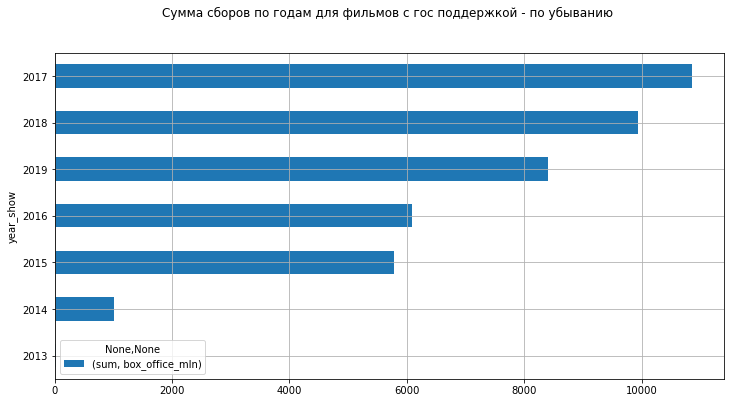

In [130]:
# построим график финансовой динамики сборов по годам  
display(
    df_gov
    .pivot_table(index='year_show', values='box_office_mln', aggfunc=['sum', 'median', 'mean'])
    .sort_values(by=('sum','box_office_mln'))
    .plot(title='Сумма сборов по годам для фильмов с гос поддержкой - по убыванию \n\n', 
          grid=True, kind='barh', y=('sum','box_office_mln'), figsize=(12, 6))
);

<AxesSubplot:title={'center':'Сумма сборов по годам для фильмов с гос поддержкой - динамика \n\n'}, xlabel='year_show'>

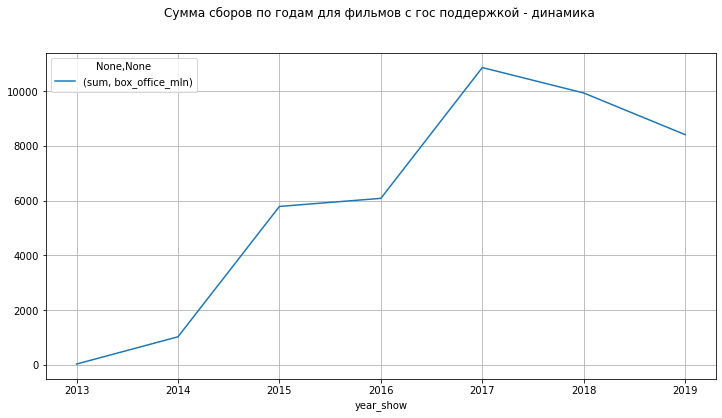

In [131]:
# график динамики сборов по годам 
display(
    df_gov
    .pivot_table(index='year_show', values='box_office_mln', aggfunc=['sum', 'median', 'mean'])
    .plot(title='Сумма сборов по годам для фильмов с гос поддержкой - динамика \n\n', 
          grid=True, y=('sum','box_office_mln'), figsize=(12, 6))
);

**Вывод сумме сборов от проката фильмов с гос поддержкой по годам:**  
- Сумма сборов для фильмов с гос поддержкой была максимальной в 2017 году (суммарный размер сборов составил 10 865 млн). 
- Сумма сборов для фильмов с гос поддержкой была минимальной в 2013 году (суммарный размер сборов составил 20 млн). 
- С 2013 по 2017 годы в представленных данных наблюдает последоавтельный рост суммы сборов
- Наичная с 2017 года можем наблюдать плавный спад суммы сборов в 2018 и 2019 годах

#### Медианное значение сборов для фильмов с гос поддержкой для каждого года 

In [132]:
# для подчета финансовой динамики сборов по годам воспользуемся срезом df_year и столбцом box_office_mln со значениями в млн
# сортировка по median 
display(
    df_gov
    .pivot_table(index='year_show', values='box_office_mln', aggfunc=['sum', 'median', 'mean'])
    .sort_values(by=('median','box_office_mln'))
);

,sum,median,mean
,box_office_mln,box_office_mln,box_office_mln
year_show,,,
2014,1017.422167,5.504518,63.588885
2015,5785.285418,9.200824,68.062181
2013,20.322385,10.161193,10.161193
2016,6081.707839,17.921116,101.361797
2019,8409.627455,25.977291,140.160458
2018,9934.069010,27.023390,177.394089
2017,10865.075301,50.451949,278.591674


Выведем для медианы отдельные графики 

<AxesSubplot:title={'center':'Медианное значение сборов по годам для фильмов с гос поддержкой  - по убыванию \n\n'}, ylabel='year_show'>

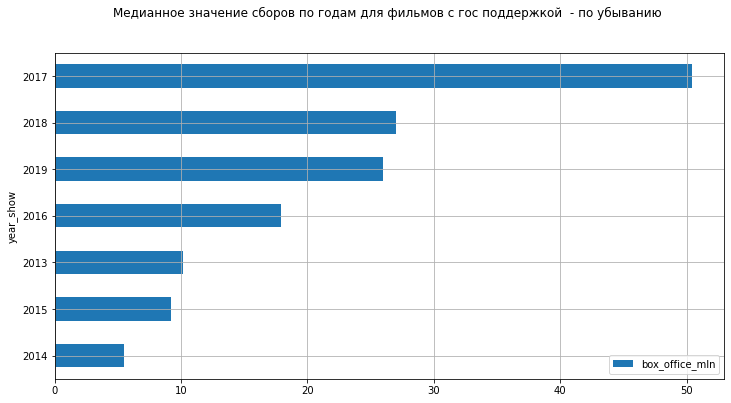

In [133]:
# выведем графие медианы сборов по годам 
display(
    df_gov
    .pivot_table(index='year_show', values='box_office_mln', aggfunc='median')
    .sort_values(by='box_office_mln')
    .plot(title='Медианное значение сборов по годам для фильмов с гос поддержкой  - по убыванию \n\n', 
          grid=True, kind='barh', y=('box_office_mln'), figsize=(12, 6))
);

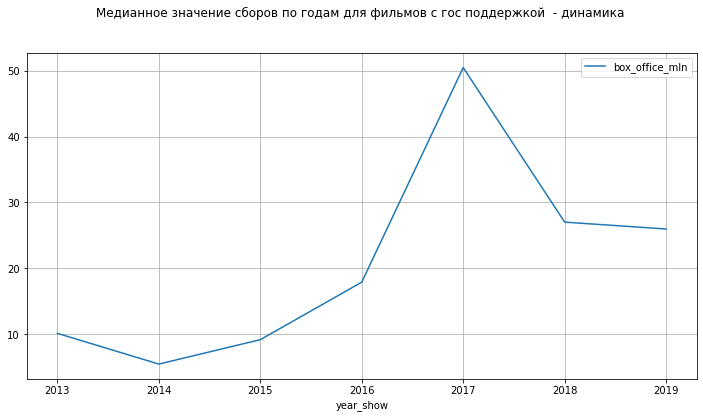

In [134]:
# выведем график медианных сборов по годам
(
    df_gov
    .pivot_table(index='year_show', values='box_office_mln', aggfunc='median')
    .plot(title='Медианное значение сборов по годам для фильмов с гос поддержкой  - динамика \n\n', 
          grid=True, y=('box_office_mln'), figsize=(12, 6))
);

**Вывод по медианному значению сборов от проката фильмов с гос поддержкой по годам:**  
- Медианное значение сборов для фильмов с гос поддержкой была максимальной в 2017 году (медианный размер сборов составил 50 млн). 
- Медианное значение сборов для фильмов с гос поддержкой была минимальной в 2014 году (медианный размер сборов составил 5,5 млн). 
- С 2013 по 2014 годы было набольшое падение медианного значения, далее с 2014 по 2017 годы в представленных данных наблюдает последоавтельный рост суммы сборов
- Наичная с 2017 года можем наблюдать резкий спад медианного размера сборов в 2018 и более плавный в 2019


#### Среднее значение сборов для фильмов с гос поддержкой для каждого года 

In [135]:
# для подчета финансовой динамики сборов по годам воспользуемся срезом df_year и столбцом box_office_mln со значениями в млн
# сортировка по mean 
display(
    df_gov
    .pivot_table(index='year_show', values='box_office_mln', aggfunc=['sum', 'median', 'mean'])
    .sort_values(by=('mean','box_office_mln'))
);

,sum,median,mean
,box_office_mln,box_office_mln,box_office_mln
year_show,,,
2013,20.322385,10.161193,10.161193
2014,1017.422167,5.504518,63.588885
2015,5785.285418,9.200824,68.062181
2016,6081.707839,17.921116,101.361797
2019,8409.627455,25.977291,140.160458
2018,9934.069010,27.023390,177.394089
2017,10865.075301,50.451949,278.591674


<AxesSubplot:title={'center':'Среднее значение сборов по годам для фильмов с гос поддержкой - по убыванию \n\n'}, ylabel='year_show'>

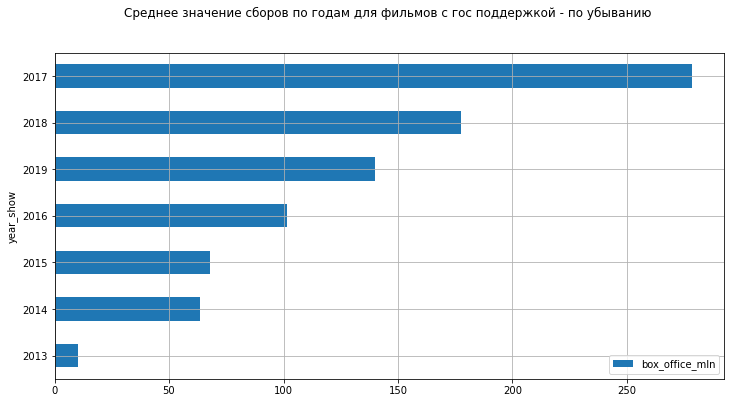

In [136]:
# построим график для среднего значения сборов по годам  
display(
    df_gov
    .pivot_table(index='year_show', values='box_office_mln', aggfunc='mean')
    .sort_values(by=('box_office_mln'))
    .plot(title='Среднее значение сборов по годам для фильмов с гос поддержкой - по убыванию \n\n', 
          grid=True, kind='barh', figsize=(12, 6))
)

<AxesSubplot:title={'center':'Среднее значение сборов по годам для фильмов с гос поддержкой  - динамика \n\n'}, xlabel='year_show'>

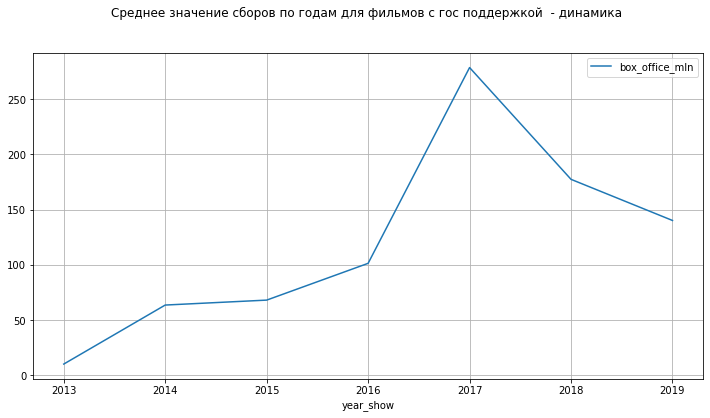

In [137]:
# построим график динамики для среднего значения сборов по годам  
display(
    df_gov
    .pivot_table(index='year_show', values='box_office_mln', aggfunc='mean')
    .plot(title='Среднее значение сборов по годам для фильмов с гос поддержкой  - динамика \n\n', 
          grid=True, figsize=(12, 6))
);

**Вывод по среднему значению сборов от проката фильмов с гос поддержкой по годам:**  
- Среднее значение сборов для фильмов с гос поддержкой была максимальной в 2017 году (медианный размер сборов составил 278.59 млн). 
- Среднее значение сборов для фильмов с гос поддержкой была минимальной в 2013 году (медианный размер сборов составил 10 млн). 
- С 2013 по 2017 годы в представленных данных наблюдает последоавтельный рост суммы сборов
- Наичная с 2017 года можем наблюдать резкий спад среднего значения сборов в 2018 и более плавный в 2019


#### Влияние возрастного ограничения на сумму сборов по годам

In [138]:
# для подчета влияния возрастного ограничения на сумму сборов по годам для фильмов с гос поддержкой
# воспользуемся срезом df_gov и столбцом box_office_mln со значениями в млн 

display(
    df_gov
    .pivot_table(index='year_show', columns='age_restriction', values='box_office_mln', aggfunc='sum')
);

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
year_show,,,,,
2013,NaN,19.957031,0.365354,NaN,NaN
2014,345.734657,447.916649,12.901436,89.643791,121.225634
2015,0.061040,2201.135951,1544.961755,55.065094,1984.061578
2016,0.658870,2817.273269,1257.426527,1.099917,2005.249256
2017,206.478186,4027.989670,1045.648979,120.109783,5464.848683
2018,NaN,5883.937244,2193.975129,94.650107,1761.506530
2019,NaN,4559.753941,1603.183457,199.590037,2047.100019


<AxesSubplot:title={'center':'Влияние возрастного ограничения на сумму сборов по годам  для фильмов с гос поддержкой \n\n'}, ylabel='year_show'>

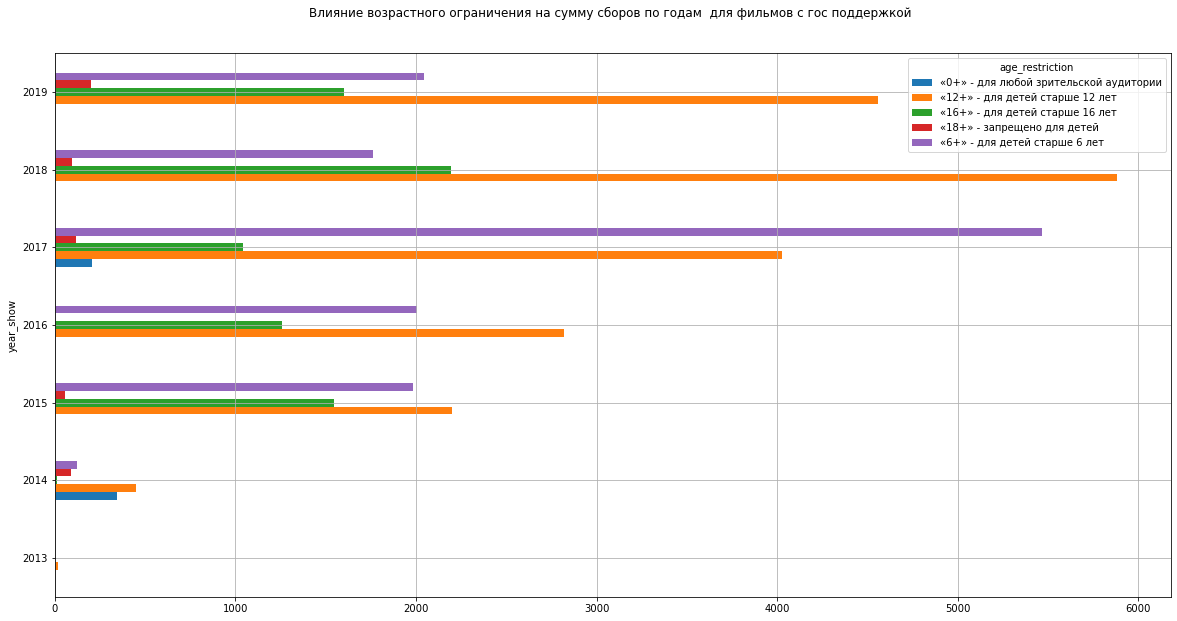

In [139]:
# построим графики влияния возрастных ограничений на сумму сборов по годам
display(
    df_gov
    .pivot_table(index='year_show', columns='age_restriction', values='box_office_mln', aggfunc='sum')
  #  .sort_values(by=('sum','box_office_mln'))
    .plot(title='Влияние возрастного ограничения на сумму сборов по годам  для фильмов с гос поддержкой \n\n', 
          grid=True, kind='barh', figsize=(20, 10))
);

<AxesSubplot:title={'center':'Влияние возрастного ограничения на сумму сборов по годам  для фильмов с гос поддержкой - динамика \n\n'}, xlabel='year_show'>

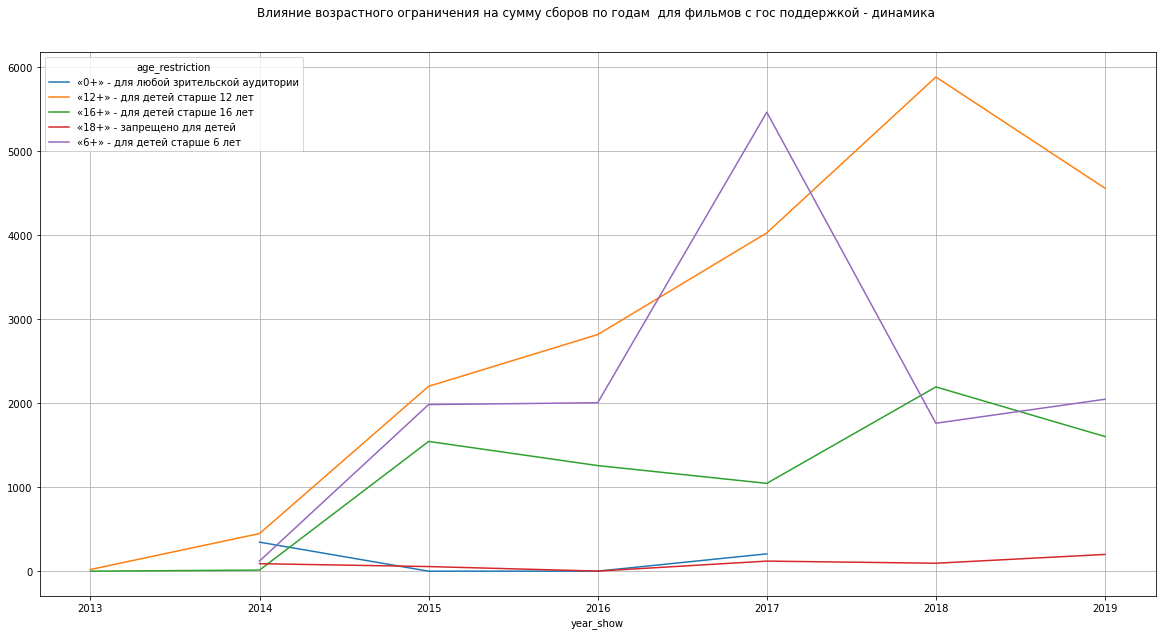

In [140]:
# построим графики влияния возрастных ограничений на сумму сборов по годам
display(
    df_gov
    .pivot_table(index='year_show', columns='age_restriction', values='box_office_mln', aggfunc='sum')
  #  .sort_values(by=('sum','box_office_mln'))
    .plot(title='Влияние возрастного ограничения на сумму сборов по годам  для фильмов с гос поддержкой - динамика \n\n', 
          grid=True, figsize=(20, 10))
);

**Влияние возрастного ограничения на сумму сборов по годам:**
- за 2013 год данные есть только для фильмов 12+ и 16+ 
- для фильмов 0+ данные есть только за период с 2014 года по 2017 
- наибольшие суммы по сборам, за исключением 2017 года, у фильмов с ограничением 12+ - пик сборов прихолдится на 2018 год в сумме 5 883.93 млн 
- наименьшие суммы по сбороам у фильмов с ограничением 0+ и 18+ - за все время наблюдений их годовые суммы сборов не превышали суммарных годовых 345 млн и 199 млн соответственно 
- третьим с конца по сборам можно считать категорию 16+ - только с 2018 году она немного превзошла по сумму сборов категорию 6+, после чего снова суммы стали меньше чем в категориях 6+ и 12+ 
- в 2014 году суммы сборов для ограничений 0+ 6+ 12+ 16+ и 18+ по уровню не сильно отличаются друг от друга до 500 млн 
- самое динамичное изменение по сборам у группы 12+: с 2013 года по 2018 год наблюдается рост от 19.9 млн до 5 883.93 млн

#### Влияние жанра на сумму сборов по отдельным годам

In [141]:
# выведем перчень жанров для фильмов с гос поддержкой 
df_gov['main_genre'].unique()

array(['драма', None, 'комедия', 'мультфильм', 'триллер', 'фэнтези',
       'семейный', 'мелодрама', 'фантастика', 'военный', 'биография',
       'детектив', 'боевик', 'детский', 'ужасы', 'мюзикл', 'приключения',
       'спорт', 'криминал', 'история', 'реальное ТВ'], dtype=object)

In [142]:
# для подчета влияния жанра на сумму сборов 
# воспользуемся срезом df_gov и столбцом box_office_mln со значениями в млн 

display(
    df_gov
    .pivot_table(index='year_show', columns='main_genre', values='box_office_mln', aggfunc='sum')
);

main_genre,биография,боевик,военный,детектив,детский,драма,история,комедия,криминал,мелодрама,мультфильм,мюзикл,приключения,реальное ТВ,семейный,спорт,триллер,ужасы,фантастика,фэнтези
year_show,,,,,,,,,,,,,,,,,,,,
2013,NaN,NaN,NaN,NaN,NaN,0.365354,NaN,19.957031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,96.488200,NaN,399.622423,NaN,10.788267,313.489846,NaN,NaN,NaN,153.470444,NaN,NaN,NaN,43.534847,NaN
2015,401.804462,229.577966,35.300096,72.618367,1.038520,1215.550331,NaN,1498.941236,NaN,11.273400,1327.675522,20.274378,NaN,NaN,NaN,168.688859,370.096075,310.667955,0.334750,110.229356
2016,NaN,NaN,415.327791,NaN,1.975132,2382.826443,NaN,957.488965,228.578204,22.947520,229.262971,81.430627,0.435132,NaN,310.645876,19.393384,73.934169,213.183252,1048.124819,83.978811
2017,NaN,NaN,8.667192,NaN,NaN,1138.982181,590.405065,3391.505813,11.215659,0.270497,1485.719924,NaN,671.045710,NaN,NaN,2779.686144,7.189790,NaN,262.040254,511.775548
2018,0.988413,57.164992,558.375393,8.425368,NaN,3840.756021,NaN,2199.489592,NaN,7.062396,1052.854528,NaN,95.755095,NaN,NaN,NaN,225.723278,46.451146,291.865814,100.874705
2019,114.090163,309.185977,NaN,57.503776,NaN,815.875572,865.063170,4012.972394,NaN,2.446886,1213.011343,NaN,438.361040,32.721103,120.308430,NaN,23.506878,139.820837,72.303795,188.978188


<AxesSubplot:title={'center':'Влияние возрастного ограничения на сумму сборов по годам  - динамика \n\n'}, xlabel='year_show'>

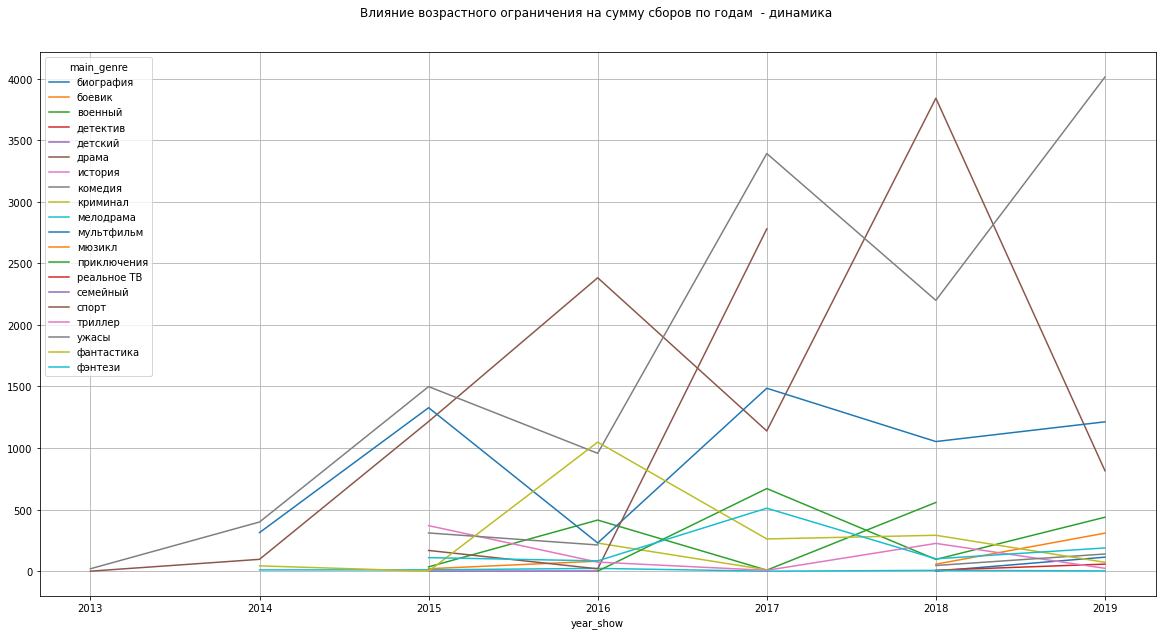

In [143]:
# построим линейные графики динамики влияния жанра на сумму сборов 
display(
    df_gov
    .pivot_table(index='year_show', columns='main_genre', values='box_office_mln', aggfunc='sum')
  #  .sort_values(by=('sum','box_office_mln'))
    .plot(title='Влияние возрастного ограничения на сумму сборов по годам  - динамика \n\n', 
          grid=True, figsize=(20, 10))
);

<AxesSubplot:title={'center':'Влияние жанра на сумму сборов по годам \n\n'}, ylabel='year_show'>

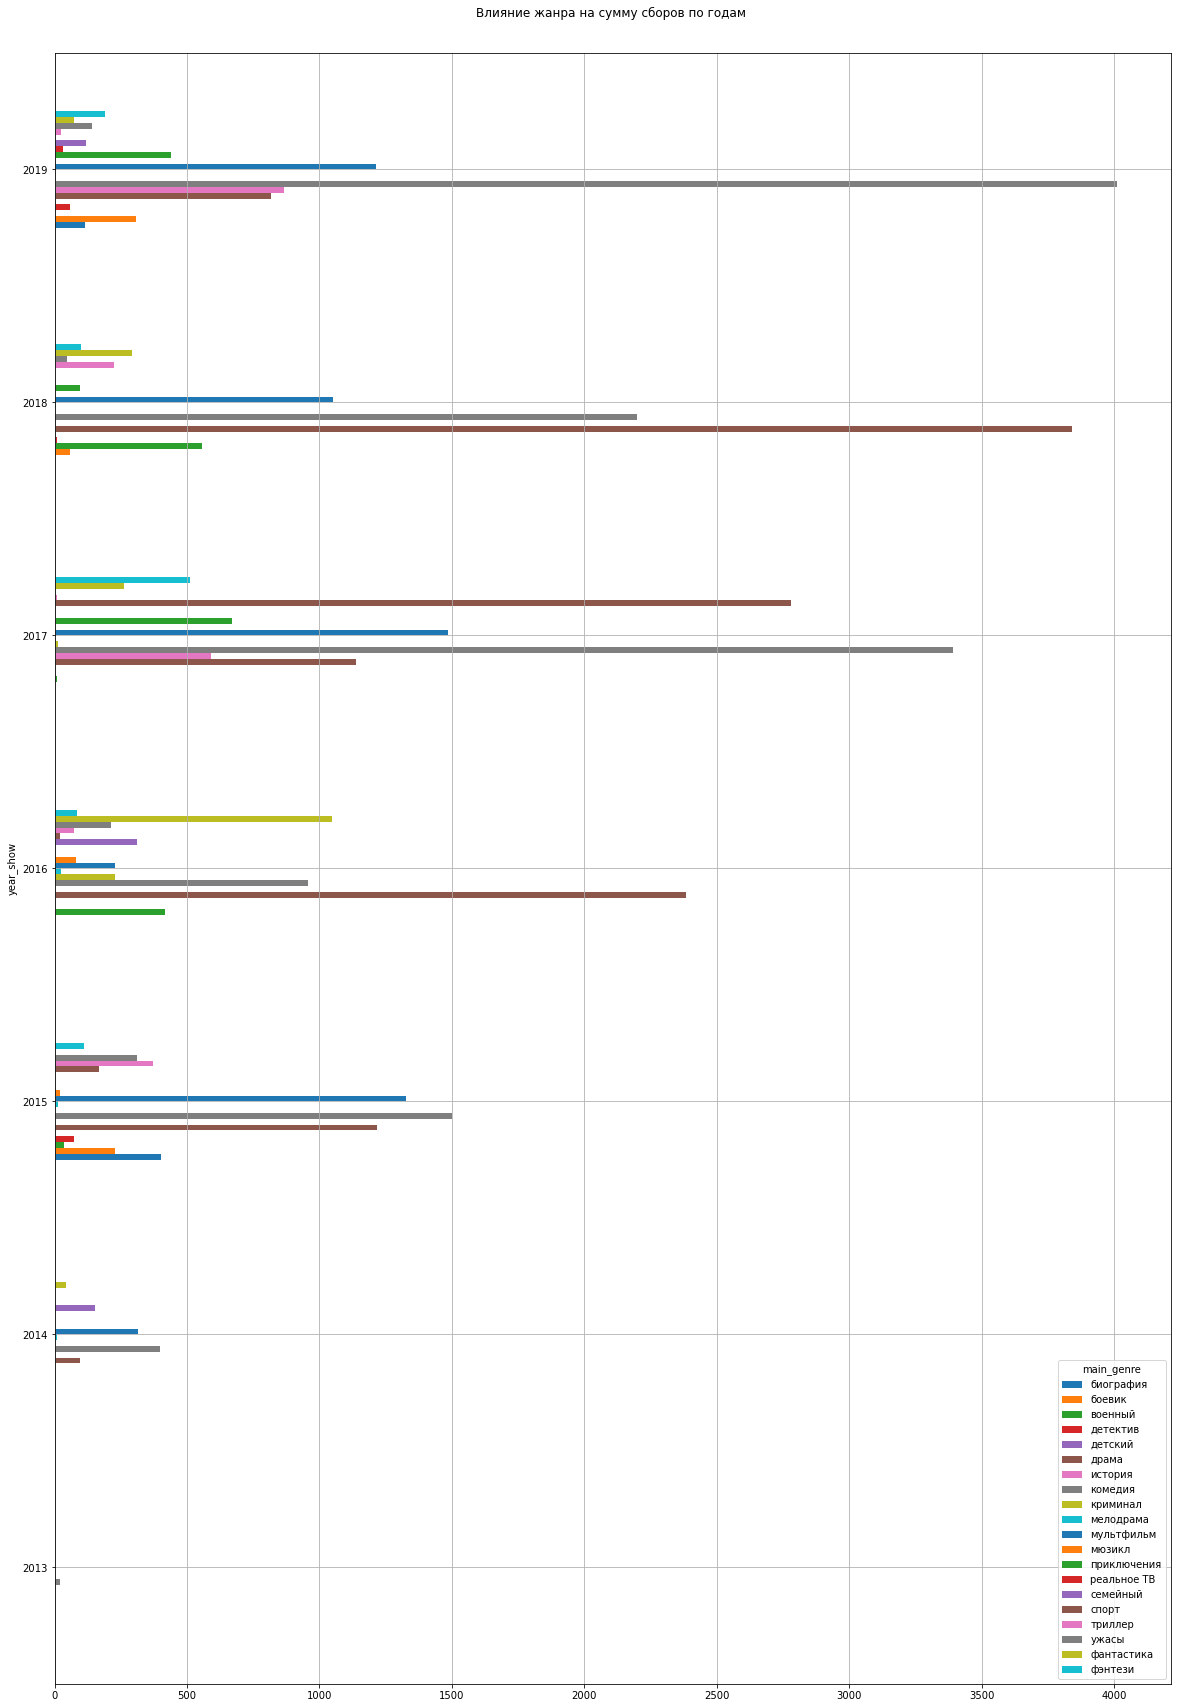

In [144]:
# построим линейные графики динамики влияния жанра на сумму сборов 
display(
    df_gov
    .pivot_table(index='year_show', columns='main_genre', values='box_office_mln', aggfunc='sum')
  #  .sort_values(by=('sum','box_office_mln'))
    .plot(title='Влияние жанра на сумму сборов по годам \n\n', 
          grid=True, kind='barh', figsize=(20, 30))
);

**Влияние жанров на сумму сборов в разбивке по годам:**
- за 2013 год данные есть только для драмы и комедии - сумма сборов  0.365354	и 19.957031	
- наибольшие суммы по сборам по годам: 
    - 2013 - комедии
    - 2014 - комедия, на втором месте мультифильм 
    - 2015 - комедия, на втором месте мультифильм
    - 2016 - драма
    - 2017 - комедия
    - 2018 - драма 
    - 2019 - комедия

#### Влияние жанра на сумму сборов по всем годам

In [145]:
# построим таблицу влияние жанра на сумму сборов по всем годам  
display(
    df_gov
    .pivot_table(index='main_genre', values='box_office_mln', aggfunc='sum')
    .sort_values(by='box_office_mln', ascending=False)
);

,box_office_mln
main_genre,
комедия,12479.977454
драма,9490.844101
мультфильм,5622.014135
спорт,2967.768387
фантастика,1718.204279
история,1455.468235
приключения,1205.596977
военный,1017.670472
фэнтези,995.836608


<AxesSubplot:title={'center':'Сумма сборов по всем годам в разбивке по жанрам - по убыванию \n\n'}, ylabel='main_genre'>

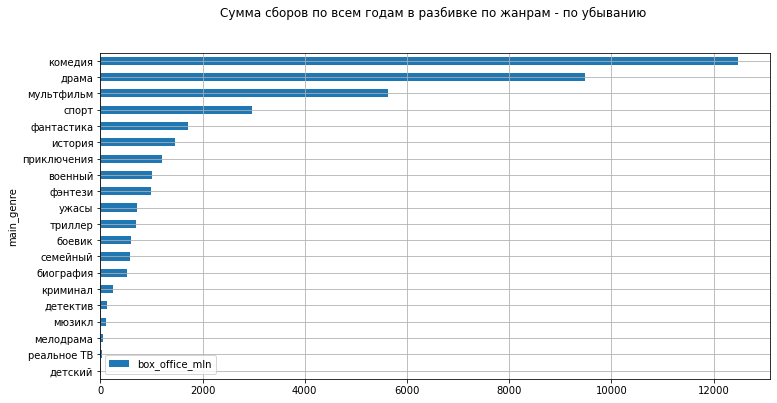

In [146]:
# построим график влияние жанра на сумму сборов по всем годам  
display(
    df_gov
    .pivot_table(index='main_genre', values='box_office_mln', aggfunc='sum')
    .sort_values(by=('box_office_mln'))
    .plot(title='Сумма сборов по всем годам в разбивке по жанрам - по убыванию \n\n', 
          grid=True, kind='barh', figsize=(12, 6))
);

**Влияние жанров на сумму сборов по всем годам:**
- самые большие кассовые сборы у комедий - 12 479.97 млн
- самые маленькие кассовые сборы у детских фильмов - 3 млн
- в топ-3 в порядке убывания входят жанры - комедия, драма, мультфильм

#### Влияние типа фильма на сумму сборов по всем годам

In [147]:
# построим таблицу влияние типа фильма на сумму сборов по всем годам  
display(
    df_gov
    .pivot_table(index='type', values='box_office_mln', aggfunc='sum')
    .sort_values(by='box_office_mln', ascending=False)
);

,box_office_mln
type,
Художественный,36490.216426
Анимационный,5623.293149


**Влияние типа фильма на сумму сборов по всем годам:**
- всего для фильмов с гос поддержкой были два типа фильма - Художественный и Анимационный
- самые большие кассовые сборы у Художественный	- 36 490.22 млн
- самые маленькие кассовые сборы у Анимационный	- 5 623.29 млн

#### Влияние студии фильма на сумму сборов по всем годам

In [148]:
# построим таблицу влияние film_studio на сумму сборов по всем годам  
display(
    df_gov
    .pivot_table(index='film_studio', values='box_office_mln', aggfunc='sum')
    .sort_values(by='box_office_mln', ascending=False)
);

,box_office_mln
film_studio,
"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",4181.941534
"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",3073.568691
"ООО ""Студия анимационного кино ""Мельница""",2890.370003
"ООО ""ТаББаК""",2787.109357
"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""ММЕ"", ООО ""Амедиа Продакшн"" и АО ""Телекомпания""",2271.754005
"ООО ""Киностудия ""Слово"" по заказу ООО ""Уолт Дисней Компании СНГ"", АО ""ВБД Груп""",1655.037688
"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия"", Государственная телевизионная компания ""Телеканал ""Россия"" - филиал федерального государственного унитарного предприятия ""Всероссийская государственная телевизионная и радиовещательная компания""",1445.731798
"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",1038.321489
"ООО ""ДК интертеймент"", ООО ""Киностудия ""Слово"", ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",820.528005


In [149]:
# построим таблицу влияние film_studio на сумму сборов по всем годам  
display(
    df_gov
    .pivot_table(index='film_studio', values='box_office_mln', aggfunc='sum')
    .sort_values(by='box_office_mln', ascending=False).head(3).index
);

Index(['ООО "Студия "ТРИТЭ" Никиты Михалкова"',
       'ООО "МЕМ-МЕДИА" по заказу АО "ВБД Груп"',
       'ООО "Студия анимационного кино "Мельница"'],
      dtype='object', name='film_studio')

**Влияние студии фильма на сумму сборов по всем годам:**
- самые большие кассовые сборы у ООО "Студия "ТРИТЭ" Никиты Михалкова"	- 4 181.94 млн
- самые маленькие кассовые сборы уНП Киностудия детских и юношеских фильмов "Илья Муромец"	- 0.001550 млн
- в топ-3 по наибольшим кассовым сборам входят:
    -  'ООО "Студия "ТРИТЭ" Никиты Михалкова"',
    - 'ООО "МЕМ-МЕДИА" по заказу АО "ВБД Груп"',
    - 'ООО "Студия анимационного кино "Мельница"'

#### Влияние страны-производителя фильма на сумму сборов по всем годам

In [150]:
# построим таблицу влияние production_country на сумму сборов по всем годам  
display(
    df_gov
    .pivot_table(index='production_country', values='box_office_mln', aggfunc='sum')
    .sort_values(by='box_office_mln', ascending=False)
);

,box_office_mln
production_country,
Россия,40925.556047
Россия-Украина,401.804462
Россия-Китай,333.597060
Россия-Сербия,307.650644
Россия-Италия,54.387243
Россия-Германия,52.444924
Россия-Латвия-Чешская Республика,21.363843
Россия-Франция-Латвия,4.731240
Россия-Украина-Польша,4.568857


**Влияние страны производителя на сумму сборов по всем годам:**
- самые большие кассовые сборы у Россия	- 40 925.556047 млн
- самые маленькие кассовые сборы у Россия-Словакия-Чехия	- 0.288019 млн

#### Влияние режиссера на сумму сборов для фильмов с гос поддержкой 

In [151]:
# выведем уникальный перечень sn_director для фильмов с гос поддержкой 
df_gov['sn_director'].unique()

array(['А.Атанесян', 'А.Якимчук', 'Р.Давлетьяров',
       'Е.Миндадзе (псевдоним Катя Шагалова)', 'М.Угаров', 'С.Серегин',
       'В.Глаголева', 'А.Войтинский', 'Д.Федоров', 'Максим Свешников',
       'Т.Аленикова', 'А.Пиманов', 'А.Цицилин', 'А.Стриженов', 'А.Зайцев',
       'Р.Прыгунов', 'С.Попов', 'Д.Месхиев', 'В.Щегольков', 'А.Прошкин',
       'П.Санаев', 'С.Мокрицкий', 'А.Мельник', 'А.Аксененко', 'Ю.Кара',
       'К.Сухарьков', 'В.Демент', 'Ф.Абрютин', 'М.Бальчюнас',
       'Э.Архангельская', 'К.Шипенко', 'Д.Елеонский', 'А.Звягинцев',
       'Е.Татаров', 'А.Федорченко', 'Ю.Фетинг', 'В.Харченко', 'И.Чижиков',
       'А.Меликян', 'А.Андрианов', 'Э.Манжеева', 'А.Калинкин',
       'Е.Константинова (псевдоним Алена Званцева)', 'Н.Джорджадзе',
       'Ф.Дмитриев', 'Р.Каримов', 'Д.Штурманова', 'А.Аравин',
       'С.Говорухин', 'К.Ангелина', 'А.Карпиловский', 'Стефано Лоренци',
       'В.Хотиненко', 'В.Штерянов при участии Е.Немых', 'С.Комаров',
       'И.Северов', 'А.Ананикян', 'К.Белевич

Режиссеров слишком много, посмотрим статистику по суммарным сборам по всем годам для топ-10 режиссеров 

In [152]:
# для подчета влияния режиссера на сумму сборов 
# воспользуемся срезом df_gov и столбцом sn_director 

display(
    df_gov
    .pivot_table(index='sn_director', values='box_office_mln', aggfunc='sum')
    .sort_values(by='box_office_mln', ascending=False)
    .head(10)
);

,box_office_mln
sn_director,
К.Шипенко,3827.772218
А.Мегердичев,2779.686144
Д.Дьяченко,2404.898634
А.Сидоров,2271.754005
О.Трофим,1445.731798
Д.Шмидт,1412.475637
Н.Лебедев,1402.255390
Д.Киселев,1399.783312
Ф.Бондарчук,1038.321489


Больше всего суммарных кассовых сборов в топ-10 режиссеров по всем годам у К.Шипенко (3827.77 млн), меньше всего - у Т.Бекмамбетов (1009.9 млн)

#### Влияние топ-10 режиссеров на сумму сборов для фильмов с гос поддержкой в разбивке по годам 

In [153]:
# сохраним топ-10 режиссеров по суммарным сборам для вех годов в top_10_director
top_10_director =  \
(
    df_gov
    .pivot_table(index='sn_director', values='box_office_mln', aggfunc='sum')
    .sort_values(by='box_office_mln', ascending=False)
    .head(10)
    .index
)
print(top_10_director)

Index(['К.Шипенко', 'А.Мегердичев', 'Д.Дьяченко', 'А.Сидоров', 'О.Трофим',
       'Д.Шмидт', 'Н.Лебедев', 'Д.Киселев', 'Ф.Бондарчук', 'Т.Бекмамбетов'],
      dtype='object', name='sn_director')


In [154]:
# для подчета влияния режиссера на сумму сборов 
# воспользуемся срезом df_gov и столбцом sn_director 

display(
    df_gov.query('sn_director in @top_10_director')
    .pivot_table(index='sn_director', columns='year_show', values='box_office_mln', aggfunc='sum')
);

year_show,2014,2015,2016,2017,2018,2019
sn_director,,,,,,
А.Мегердичев,NaN,NaN,NaN,2779.686144,NaN,NaN
А.Сидоров,NaN,NaN,NaN,NaN,2271.754005,NaN
Д.Дьяченко,NaN,294.590751,270.538438,1655.037688,184.731758,NaN
Д.Киселев,NaN,NaN,NaN,1399.783312,NaN,NaN
Д.Шмидт,NaN,704.928216,NaN,206.478186,NaN,501.069235
К.Шипенко,1.52375,NaN,NaN,752.679777,NaN,3073.568691
Н.Лебедев,NaN,NaN,1402.255390,NaN,NaN,NaN
О.Трофим,NaN,NaN,NaN,NaN,1445.731798,NaN
Т.Бекмамбетов,NaN,NaN,308.401483,NaN,701.507030,NaN


**Влияние режиссеров на сумму сборов по фильмам с гос поддержкой в разбивке по годам:**
- самые большие кассовые сборы в 2019 году у К.Шипенко - 3 073.56 млн
- самые маленькие кассовые сборы в 2014 году у К.Шипенко - 1.52 млн
- наибольшее количество годов, в которые были кассовы сборы у Д.Дьяченко - у него есть данные о сборах с 2015, 2016, 2017 и 2018 годах 
- сборы были только от фильмов А.Мегердичева были только в 2017 году 
- сборы были только от фильмов А.Сидорова были только в 2018 
- сборы были только от фильмов Д.Киселев были только в 2017
- сборы были только от фильмов Н.Лебедев	 были только в 2016 
- сборы были только от фильмов О.Трофима были только в 2018
- сборы были только от фильмов Ф.Бондарчук были только в 2016 
- сборы в 2014 годы были только от фильмов одного режиссера -  К.Шипенко
- наибольшое число режиссеров фильмов со сборами было в 2017 году - 5 режиссеров



### Исследование рейтинга фильмов с гос поддержкой

#### Исследование медианного рейтинга по жанрам фильмов с гос поддержкой по всем годам 

In [155]:
# построим таблицу влияние жанра на медианный рейтинг по всем годам  
display(
    df_gov
    .pivot_table(index='main_genre', values='ratings', aggfunc='median')
    .sort_values(by='ratings', ascending=False)
);

,ratings
main_genre,
криминал,7.80
детский,7.30
спорт,7.00
биография,6.90
фэнтези,6.80
детектив,6.80
мюзикл,6.60
драма,6.50
боевик,6.45


**Влияние жанра фильма на медианный рейтинг фильма с гос поддержкой по всем годам:**
- самые большой рейтинг у криминала - 7.80
- самый низкий ретинг у семейного - 4.80


#### Исследование максимального рейтинга по жанрам фильмов с гос поддержкой по всем годам 

In [156]:
# построим таблицу влияние жанра на максимальный рейтинг по всем годам  
display(
    df_gov
    .pivot_table(index='main_genre', values='ratings', aggfunc='max')
    .sort_values(by='ratings', ascending=False)
);

,ratings
main_genre,
фантастика,9.4
драма,9.0
криминал,8.5
фэнтези,7.9
боевик,7.8
детектив,7.6
спорт,7.5
приключения,7.5
биография,7.5


**Влияние жанра фильма на максимальный рейтинг фильма с гос поддержкой по всем годам:**
- самые максимальный рейтинг был у фантастики - 9.4
- самый низкий из максимальных рейтингов был у реальное ТВ - 5.6


#### Исследование медианного рейтинга по режиссерам с гос поддержкой по всем годам 

In [157]:
# построим таблицу влияние режиссера на медианный рейтинг по всем годам  
display(
    df_gov
    .pivot_table(index='sn_director', values='ratings', aggfunc='median')
    .sort_values(by='ratings', ascending=False)
);

,ratings
sn_director,
Ю.Кара,9.40
Н.Степанова при участии С.Иванова,9.00
А.Атанесян,8.10
К.Оганисян,7.90
А.Андрианов,7.80
В.Татарский,7.80
И.Шахназаров,7.80
М.Михайлова,7.70
А.Игудин,7.70


**Влияние режиссера фильма на медианный рейтинг фильма с гос поддержкой по всем годам:**
- самые большой рейтинг у Ю.Кара - 9.4
- самый низкий ретинг у М.Свешников - 1.0


#### Исследование максимального рейтинга по режиссерам с гос поддержкой по всем годам 

In [158]:
# построим таблицу влияние режиссера на максимальный рейтинг по всем годам  
display(
    df_gov
    .pivot_table(index='sn_director', values='ratings', aggfunc='max')
    .sort_values(by='ratings', ascending=False)
);

,ratings
sn_director,
Ю.Кара,9.4
Н.Степанова при участии С.Иванова,9.0
В.Тодоровский,8.5
Р.Давлетьяров,8.5
Р.Прыгунов,8.2
А.Атанесян,8.1
К.Худяков,8.0
К.Оганисян,7.9
П.Руминов,7.8


**Влияние режиссера фильма на максимальный рейтинг фильма с гос поддержкой по всем годам:**
- самые большой рейтинг у Ю.Кара - 9.4
- самый низкий из максимальных ретингов у М.Свешников - 1.0


#### Исследование медианного рейтинга по возрастным ограничениям фильмов с гос поддержкой по всем годам 

In [159]:
# построим таблицу влияние возрастных ограничений на медианный рейтинг по всем годам  
display(
    df_gov
    .pivot_table(index='age_restriction', values='ratings', aggfunc='median')
    .sort_values(by='ratings', ascending=False)
);

,ratings
age_restriction,
«18+» - запрещено для детей,6.35
«12+» - для детей старше 12 лет,6.20
«0+» - для любой зрительской аудитории,6.10
«16+» - для детей старше 16 лет,6.10
«6+» - для детей старше 6 лет,6.10


**Влияние по возрастным ограничениям фильмов на медианный рейтинг фильма с гос поддержкой по всем годам:**
- самые большой медианный рейтинг у «18+»  - 6.35
- самый низкий медианный ретинг у нескольких категорий «6+» 16+ 0+ - 6.1


#### Исследование максимального рейтинга по возрастным ограничениям фильмов с гос поддержкой по всем годам 

In [160]:
# построим таблицу влияние возратсного ограничения на максимальный рейтинг по всем годам  
display(
    df_gov
    .pivot_table(index='age_restriction', values='ratings', aggfunc='max')
    .sort_values(by='ratings', ascending=False)
);

,ratings
age_restriction,
«6+» - для детей старше 6 лет,9.4
«16+» - для детей старше 16 лет,9.0
«12+» - для детей старше 12 лет,8.5
«18+» - запрещено для детей,8.0
«0+» - для любой зрительской аудитории,6.7


**Влияние режиссера фильма на максимальный рейтинг фильма с гос поддержкой по всем годам:**
- самые большой рейтинг «6+» - 9.4
- самый низкий из максимального ретинга у «0+» - 6.7


### Исследование окупаемости фильмов 

In [161]:
# создадим дополнительный столбец, хранящий разницу между кассовым сбором и затраченным бюджетом
df_gov['income'] = df_gov['box_office_mln'] - df_gov['budget_mln']

#### Исследование окупаемости фильмов с гос поддержкой по разным годам

In [162]:
# для подчета финансовой динамики окупаемости по годам воспользуемся срезом df_gov и столбцом income со значениями в млн 
display(
    df_gov
    .pivot_table(index='year_show', values='income', aggfunc=['sum', 'median', 'mean'])
    .sort_values(by=('sum','income'), ascending=False)
);

,sum,median,mean
,income,income,income
year_show,,,
2017,3913.502733,-33.222277,100.346224
2018,2933.404911,-37.594026,52.382231
2013,-235.113005,-117.556502,-117.556502
2014,-285.062616,-38.122768,-17.816414
2016,-1454.528829,-52.008798,-24.242147
2015,-1911.384805,-38.805656,-22.486880
2019,-2825.446437,-45.909806,-47.090774


- Самая высокая суммарная окупаемость у фильмов  с гос поддержкой в 2017 году - 3913.50 млн 
- самая маленькая суммарная окупаемость у фильмов  с гос поддержкой в 2019 году - -2825.44 млн 
- положительная суммарная окупаемость у фильмов с гос поддержкой есть только в 2018 и 2019 годах 
- медианная окупаемость отрицательная на всем периоде исследования 
- средняя окупаемость положительная в 2018 и 2019 годах 

#### Исследование влияния жанра на общую  сумму окупаемости фильмов с гос поддержкой по всем годам

In [163]:
# для подчета влияния жанра на окупаемость фильма в разбивке по годам  
# воспользуемся срезом df_gov и столбцом income со значениями в млн 

display(
    df_gov
    .pivot_table(index='main_genre', values='income', aggfunc='sum')
    .sort_values(by=('income'), ascending=False)
);

,income
main_genre,
комедия,6479.538076
спорт,2257.299422
фантастика,219.103464
ужасы,146.245564
биография,-12.050599
семейный,-19.375037
реальное ТВ,-47.278897
боевик,-87.507873
детский,-136.284352


**Влияние жанра фильма на суммарную окупаемость фильма с гос поддержкой по всем годам:**
- самые большая суммарная окупаемость  - комедия	6479.538076 млн
- самый маленькая суммарная окупаемость - приключения	-2111.269212
- положиельная окупаемость есть только в жанрах - комедия, спорт, фантастика, ужасы


#### Исследование влияния режиссера на общую  сумму окупаемости фильмов с гос поддержкой по всем годам

In [164]:
# для подчета влияния жанра на окупаемость фильма в разбивке по годам  
# воспользуемся срезом df_gov и столбцом income со значениями в млн 

display(
    df_gov
    .pivot_table(index='sn_director', values='income', aggfunc='sum')
    .sort_values(by=('income'), ascending=False)
);

,income
sn_director,
К.Шипенко,3122.841550
А.Мегердичев,2189.493953
А.Сидоров,1707.969288
Д.Дьяченко,1624.203322
О.Трофим,1297.146576
Ф.Бондарчук,788.321489
Н.Лебедев,766.971523
Д.Шмидт,698.312261
Д.Киселев,696.959413


**Влияние режиссера фильма на суммарную окупаемость фильма с гос поддержкой по всем годам:**
- самые большая суммарная окупаемость  - К.Шипенко	3122.841550 млн
- самый маленькая суммарная окупаемость - О.Степченко	-1971.477243 млн
- топ-15 режиссеров с положиельной окупаемостью  - К.Шипенко, А.Мегердичев, А.Сидоров	, Д.Дьяченко, О.Трофим


## Шаг 5. Общий вывод

В ходе исследования были изучены фильмы, которые вышли в прокат и фильмы которые получили гос поддержку 

Общий объем исходного датасета - 26 699 записей

Исследования прокатных фильмов 

Объем  датасета прокатных фильмов - 3 134 записей, содержит записи с 2019 по 2019 года 

Результаты исследования прокатных фильмов: 
* Наибольшее количество прокатных фильмов было в 2019 и 2016 годах, наименьшее - в 2010 году
* Наибольшая доля прокатных фильмов  от общего числа фильмов была в 2017 году, наименьшая - в 2010 году

Исследование суммы сборов 
* Общая сумма сборов была максимальной в 2018 году (суммарный размер сборов составил 49 668). С 2010 по 2013 годы в представленных данных содержатся минимальные суммы сборов от 2 до 30 млн
* Медианная сумма сборов была максимальной в 2017 году (около 10 млн)
* Средняя сумма сборов была максимальной в 2017 году (около 136 млн)
* наибольшие суммы по сборам у фильмов с ограничением 16+ - пик сборов прихолдится на 2017 год в сумме 18745 млн
* наименьшие суммы по сбороам у фильмов с ограничением 0+ - за все время наблюдений их сборы не превышали суммарных годовых 379 млн



Исследования фильмов с гос поддержкой 

- Количество фильмов с гос поддержкой и с заданными сборами после проката:  318
- В исследуемый временной промежутое попадают фильмы за 2013-2019 года 
* Наибольшее количество фильмов было в 2015 году - 85, Наименьшее в 2013 году - 2
* Наибольший объем общего бюджета:
    * был в 2019 году - 11 235 млн
    * выделялся Фонд кино - 28 413.574535 млн за все года 
* Наименьший объем общего бюджета:
    * был в 2013 году - 255 млн
    * выделялся Министерство культуры, Фонд кино - 2 649.309609 млн за все года 
* Наибольший объем возвратных средств был в 2016 году - 921.5 млн
* Наибольший объем невозвратных средств был в 2016 году - 3 370 млн
* Наименьший объем возвратных средств был в 2013 году - 0 млн
* Наименьший объем невозвратных средств был  в 2013 году - 134.34 млн
- Наибольший объем средств гос бюджета был в 2016 году - 4 291.63 млн
- Наименьший объем средств гос бюджет был в 2013 году - 134.34 млн

Исследование суммы сборов: 
- была максимальной в 2017 году (суммарный размер сборов составил 10 865 млн).
- была минимальной в 2013 году (суммарный размер сборов составил 20 млн).
* наибольшие суммы по сборам, за исключением 2017 года, у фильмов с ограничением 12+ - пик сборов прихолдится на 2018 год в сумме 5 883.93 млн
* наименьшие суммы по сбороам у фильмов с ограничением 0+ и 18+ - за все время наблюдений их годовые суммы сборов не превышали суммарных годовых 345 млн и 199 млн соответственно
* наибольшие суммы по сборам по годам:
    * 2013 - комедии
    * 2014 - комедия, на втором месте мультифильм
    * 2015 - комедия, на втором месте мультифильм
    * 2016 - драма
    * 2017 - комедия
    * 2018 - драма
    * 2019 - комедия
* самые большие кассовые сборы за все время у комедий - 12 479.97 млн
* самые маленькие кассовые сборы за все время у детских фильмов - 3 млн
* всего для фильмов с гос поддержкой были два типа фильма - Художественный и Анимационный
* самые большие кассовые сборы у Художественный - 36 490.22 млн
* самые маленькие кассовые сборы у Анимационный - 5 623.29 млн
* самые большие кассовые сборы у ООО "Студия "ТРИТЭ" Никиты Михалкова" - 4 181.94 млн
* самые маленькие кассовые сборы уНП Киностудия детских и юношеских фильмов "Илья Муромец" - 0.001550 млн
* самые большие кассовые сборы у Россия - 40 925.556047 млн
* самые маленькие кассовые сборы у Россия-Словакия-Чехия - 0.288019 млн
* Больше всего суммарных кассовых сборов в топ-10 режиссеров по всем годам у К.Шипенко (3827.77 млн), меньше всего - у Т.Бекмамбетов (1009.9 млн)

Исследование рейтинга фильмов с гос поддержкой

* самые большой рейтинг у криминала - 7.80
* самый низкий ретинг у семейного - 4.80
* самые максимальный рейтинг был у фантастики - 9.4
* самый низкий из максимальных рейтингов был у реальное ТВ - 5.6
* самые большой рейтинг у режиссера Ю.Кара - 9.4
* самый низкий из максимальных рейтингов у режиссера М.Свешников - 1.0
* самые большой медианный рейтинг у «18+» - 6.35
* самый низкий медианный ретинг у нескольких категорий «6+» 16+ 0+ - 6.1
* самые большой рейтинг «6+» - 9.4
* самый низкий из максимального ретинга у «0+» - 6.7

Исследование окупаемости фильмов

* Самая высокая суммарная окупаемость у фильмов с гос поддержкой в 2017 году - 3913.50 млн
* самая маленькая суммарная окупаемость у фильмов с гос поддержкой в 2019 году - -2825.44 млн
* положительная суммарная окупаемость у фильмов с гос поддержкой есть только в 2018 и 2019 годах
* медианная окупаемость отрицательная на всем периоде исследования
* средняя окупаемость положительная в 2018 и 2019 годах
* самые большая суммарная окупаемость - комедия 6479.538076 млн
* самый маленькая суммарная окупаемость - приключения -2111.269212
* положиельная окупаемость есть только в жанрах - комедия, спорт, фантастика, ужасы
* самые большая суммарная окупаемость - К.Шипенко 3122.841550 млн
* самый маленькая суммарная окупаемость - О.Степченко -1971.477243 млн
* топ-15 режиссеров с положиельной окупаемостью - К.Шипенко, А.Мегердичев, А.Сидоров , Д.Дьяченко, О.Трофим